# Project GeekFinder

With Project GeekFinder, we are trying to create a content-based Recommendation System where users can connect with like-minded people who share a similar learning path in their career. It's similar to the many Dating apps out there, but this one is more career-focused 😎

# 1. Data Collection

## Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 

## Loading the Data

Working with the data points that we got from our own survey and another from the student community, Crework.

In [2]:
survey_data = pd.read_csv('/work/Raw Data Files/studev_survey_data.csv')
crework_data = pd.read_csv('/work/Raw Data Files/crework_data.csv')
has_project_updated = pd.read_csv('/work/Generated Data Files/project_updated_column.csv')

In [3]:
survey_data.sample(10)

,Timestamp,Name,Email,Age,"Where are you currently residing? Enter in this format - City, State",What technical skills do you already have?,Domain of interest under CSE,Sub-domains under Web Development,Skills you want to learn for Web Dev,Number of internships done under the domain,...,Number of internships done under this domain.2,Sub domains under Data Science,Skills you want to learn for Data Science,Number of internships done under the domain.3,Have you worked on any projects under the domain of your interest?,Which is the best project you have worked on related to your domain of interest and why?,What next are you looking forward to in your career?,What kind of people do you want to collaborate with to learn the most?,What's your location preference when collaborating with your peers?,Email Address
143,8/20/2021 20:49:23,NaN,NaN,20,"Raigarh, Chhattisgarh","Python, Java",Blockchain Development,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,No,NaN,Finding an internship,Students,Local city,NaN
48,8/19/2021 12:58:06,Ayush Raj,NaN,21,"Bokaro Steel City, Jharkhand","JavaScript, HTML/CSS, SQL, Python, C++, C, Jav...",App Development,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,My current project which I am working on for a...,Finding a job,"Students, Working Professionals",Remote,NaN
32,8/19/2021 12:30:28,Aman Vishwakarma,NaN,22,"Ahmedabad , Gujarat","JavaScript, HTML/CSS, SQL, Python, Bash/Shell/...",Web Development,"Front-end Wed Development, Back-end Web Develo...","HTML, CSS, JavaScript, Python, TypeScript, Mon...",3.0,...,NaN,NaN,NaN,NaN,Yes,.,Finding a job,"Students, Working Professionals",Local city,NaN
86,8/19/2021 15:08:52,NaN,NaN,19,"Varanasi, Uttar Pradesh","HTML/CSS, Python, C++, C",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,...,NaN,"Machine Learning, Deep Learning","Python, JavaScript",0,Yes,Sentiment analysis for depression,Finding an internship,"Students, Working Professionals",Remote,NaN
75,8/19/2021 13:59:05,NaN,NaN,20,"Ranchi, Jharkhand","Python, C",Cyber Security,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,Finding a job,"Students, Working Professionals",Remote,NaN
47,8/19/2021 12:56:48,Aaryaman Bhardwaj,NaN,20,"Jaipur, Rajasthan","SQL, Python, Bash/Shell/Powershell, C++, C, Ja...",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,...,NaN,"Machine Learning, Deep Learning, Natural Langu...",R,0,Yes,One of my best projects is Music Generation us...,Finding an internship,"Students, Working Professionals",Remote,NaN
105,8/19/2021 18:27:38,NaN,NaN,21,"Moradabad, Uttar pradesh","JavaScript, HTML/CSS, SQL, Python, PHP",Web Development,Full-stack Web Development,"TypeScript, MongoDB, Node.js",3.0,...,NaN,NaN,NaN,NaN,Yes,I’ve created a weather forecasting website,Finding a job,Working Professionals,Remote,NaN
5,8/18/2021 22:03:58,Muskan Bagrecha,NaN,21,"Bangalore, Karnataka","HTML/CSS, SQL, Python, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,...,NaN,"Machine Learning, Deep Learning, Natural Langu...","R, SQL, Julia",1,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote,NaN
113,8/19/2021 18:51:16,NaN,NaN,21,"Pune, Maharashtra","SQL, Python, R",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,...,NaN,"Machine Learning, Deep Learning","Python, JavaScript, Scala, R, SQL, Julia, Tableau",0,No,NaN,Finding an internship,"Students, Working Professionals",Local city,NaN
101,8/19/2021 18:26:33,NaN,NaN,20,"Patna,Bihar","JavaScript, HTML/CSS, SQL, Python, C++, C, Jav...",Cyber Security,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,Finding a job,"Students, Working Professionals",Remote,NaN


# 2. Data Cleaning

## Initial Cleaning

### Renaming the columns

In [4]:
survey_data.columns

Index(['Timestamp', 'Name', 'Email', 'Age',
       'Where are you currently residing? Enter in this format - City, State',
       'What technical skills do you already have?',
       'Domain of interest under CSE', 'Sub-domains under Web Development',
       'Skills you want to learn for Web Dev',
       'Number of internships done under the domain',
       'Sub-domains under App Development',
       'Skills you want to learn for App Dev',
       'Number of internships done under this domain', 'Sub-domain',
       'Skills you want to learn ',
       'Number of internships done under the domain.1',
       'Sub domain under DevOps', 'Skills you want to learn',
       'Number of internships done under this domain.1',
       'Sub-domains under Cyber Security', 'Skills you want to learn.1',
       'Number of internships done under the domain.2',
       'Sub-domains under Blockchain', 'Skills you want to learn.2',
       'Number of internships done under this domain.2',
       'Sub domains u

In [5]:
survey_data.columns = ['timestamp', 'name', 'email', 'age', 'location', 'current_skills', 'domain', 
        'webdev_fields', 'webdev_wanted_skills', 'webdev_internships',
        'appdev_fields', 'appdev_wanted_skills', 'appdev_internships', 
        'cloud_fields', 'cloud_wanted_skills', 'cloud_internships',
        'devops_fields', 'devops_wanted_skills', 'devops_internships',
        'cybersec_fields', 'cybersec_wanted_skills', 'cybersec_internships',
        'blockchain_fields', 'blockchain_wanted_skills', 'blockchain_internships',
        'datascience_fields', 'datascience_wanted_skills', 'datascience_internships',
        'done_project', 'project_desc', 'next_goal', 'peer_pref', 'location_pref', 'email']

In [6]:
survey_data.columns

Index(['timestamp', 'name', 'email', 'age', 'location', 'current_skills',
       'domain', 'webdev_fields', 'webdev_wanted_skills', 'webdev_internships',
       'appdev_fields', 'appdev_wanted_skills', 'appdev_internships',
       'cloud_fields', 'cloud_wanted_skills', 'cloud_internships',
       'devops_fields', 'devops_wanted_skills', 'devops_internships',
       'cybersec_fields', 'cybersec_wanted_skills', 'cybersec_internships',
       'blockchain_fields', 'blockchain_wanted_skills',
       'blockchain_internships', 'datascience_fields',
       'datascience_wanted_skills', 'datascience_internships', 'done_project',
       'project_desc', 'next_goal', 'peer_pref', 'location_pref', 'email'],
      dtype='object')

### Domain Info

### Total domains - 7
1. 'webdev' - Web Development
2. 'appdev' - App Development
3. 'cloud' - Cloud Computing
4. 'devops' - DevOps
5. 'cybersec' - Cyber Security
6. 'blockchain' - Blockchain
7. 'datascience' - Data Science

### Removing unnecessary columns and first 3 rows (dummy data)

In [7]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  161 non-null    object 
 1   name                       54 non-null     object 
 2   email                      3 non-null      object 
 3   age                        161 non-null    object 
 4   location                   161 non-null    object 
 5   current_skills             161 non-null    object 
 6   domain                     161 non-null    object 
 7   webdev_fields              63 non-null     object 
 8   webdev_wanted_skills       63 non-null     object 
 9   webdev_internships         63 non-null     float64
 10  appdev_fields              12 non-null     object 
 11  appdev_wanted_skills       12 non-null     object 
 12  appdev_internships         12 non-null     float64
 13  cloud_fields               2 non-null      object 

In [8]:
#removing invalid columns
clean_survey = survey_data.drop(survey_data.columns[[0, 1, 2, 33]], axis = 1)

In [9]:
clean_survey.head(6)

,age,location,current_skills,domain,webdev_fields,webdev_wanted_skills,webdev_internships,appdev_fields,appdev_wanted_skills,appdev_internships,...,blockchain_wanted_skills,blockchain_internships,datascience_fields,datascience_wanted_skills,datascience_internships,done_project,project_desc,next_goal,peer_pref,location_pref
0,13,earth,"Python, Bash/Shell/Powershell, C#",App Development,NaN,NaN,NaN,Android Developer,"JavaScript, Swift",1.0,...,NaN,NaN,NaN,NaN,NaN,Yes,ASsas,Finding an internship,Students,Remote/Local
1,21,"Bengaluru, Karnataka","JavaScript, HTML/CSS",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Machine Learning,"Python, JavaScript",1,Yes,jhasgjadsd,Finding a job,Students,Remote/Local
2,21,"Moon,Universe","Python, Bash/Shell/Powershell",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning, Natural Langu...",Python,1,Yes,Wind speed prediction using cyclone images,Research project,Students,Remote/Local
3,22,"Agartala, Tripura","SQL, Python, C++, R",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing,...","Python, Scala, SQL",0,No,NaN,Finding an internship,Students,Remote
4,19,"Chennai, Tamil Nadu","SQL, Python, Bash/Shell/Powershell, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning","Python, JavaScript, R",1,Yes,The one I'm working on currently xD. It's rela...,Research project,Students,Local city
5,21,"Bangalore, Karnataka","HTML/CSS, SQL, Python, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning, Natural Langu...","R, SQL, Julia",1,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote


In [10]:
#removing the first three dummy rows
clean_survey = clean_survey.drop(clean_survey.index[[0,1,2]], axis=0)
#resetting the index
clean_survey.reset_index(drop=True, inplace=True)

In [11]:
clean_survey.head(5)

,age,location,current_skills,domain,webdev_fields,webdev_wanted_skills,webdev_internships,appdev_fields,appdev_wanted_skills,appdev_internships,...,blockchain_wanted_skills,blockchain_internships,datascience_fields,datascience_wanted_skills,datascience_internships,done_project,project_desc,next_goal,peer_pref,location_pref
0,22,"Agartala, Tripura","SQL, Python, C++, R",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing,...","Python, Scala, SQL",0,No,NaN,Finding an internship,Students,Remote
1,19,"Chennai, Tamil Nadu","SQL, Python, Bash/Shell/Powershell, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning","Python, JavaScript, R",1,Yes,The one I'm working on currently xD. It's rela...,Research project,Students,Local city
2,21,"Bangalore, Karnataka","HTML/CSS, SQL, Python, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning, Natural Langu...","R, SQL, Julia",1,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote
3,20,"Chhattisgarh, raigarh",Python,Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing","Python, SQL",0,Yes,"Recommendations system, because it's in high ...",Finding an internship,Students,Remote
4,22,"Sonipat, Haryana","JavaScript, SQL, Python",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing",SQL,0,Yes,I built an emotions detection model which can ...,Upskill,Working Professionals,Remote


## Restructuring the DataFrame

### Merge 1: All sub-domain columns into 'fields'

In [12]:
dummy_df = clean_survey
dummy_df.head(5)

,age,location,current_skills,domain,webdev_fields,webdev_wanted_skills,webdev_internships,appdev_fields,appdev_wanted_skills,appdev_internships,...,blockchain_wanted_skills,blockchain_internships,datascience_fields,datascience_wanted_skills,datascience_internships,done_project,project_desc,next_goal,peer_pref,location_pref
0,22,"Agartala, Tripura","SQL, Python, C++, R",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing,...","Python, Scala, SQL",0,No,NaN,Finding an internship,Students,Remote
1,19,"Chennai, Tamil Nadu","SQL, Python, Bash/Shell/Powershell, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning","Python, JavaScript, R",1,Yes,The one I'm working on currently xD. It's rela...,Research project,Students,Local city
2,21,"Bangalore, Karnataka","HTML/CSS, SQL, Python, C++, C, Java",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Deep Learning, Natural Langu...","R, SQL, Julia",1,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote
3,20,"Chhattisgarh, raigarh",Python,Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing","Python, SQL",0,Yes,"Recommendations system, because it's in high ...",Finding an internship,Students,Remote
4,22,"Sonipat, Haryana","JavaScript, SQL, Python",Data Science(AI/ML/Big Data etc.),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Machine Learning, Natural Language Processing",SQL,0,Yes,I built an emotions detection model which can ...,Upskill,Working Professionals,Remote


In [13]:
#Merging field(sub-domain) preferences of different domains under a single column.
fields = dummy_df.webdev_fields.combine_first(dummy_df.appdev_fields).combine_first(dummy_df.cloud_fields).combine_first(dummy_df.devops_fields).combine_first(dummy_df.cybersec_fields).combine_first(dummy_df.blockchain_fields).combine_first(dummy_df.datascience_fields)

In [14]:
dummy_df['fields'] = fields

In [15]:
#Dropping all the extra columns left after merging.
for col in dummy_df.columns:
    if "fields" in col:
        if col!="fields":
            dummy_df.drop(col, axis=1, inplace=True)

In [16]:
dummy_df.fields.unique()

array(['Machine Learning, Natural Language Processing, Computer Vision',
       'Machine Learning, Deep Learning',
       'Machine Learning, Deep Learning, Natural Language Processing',
       'Machine Learning, Natural Language Processing',
       'Machine Learning, Deep Learning, Natural Language Processing, Computer Vision',
       'Machine Learning', 'Natural Language Processing, Computer Vision',
       'Front-end Wed Development', 'Full-stack Web Development',
       'Front-end Wed Development, Back-end Web Development, Full-stack Web Development',
       'Networking',
       'Front-end Wed Development, Full-stack Web Development',
       'Natural Language Processing', 'Android Developer, flutter',
       'Front-end Wed Development, Back-end Web Development',
       'Deep Learning', 'Android Developer', 'Business Analyst',
       'Android Developer, iOS Developer', 'SaaS, PaaS, IaaS',
       'Ethical Hacking', 'Network Security in Ethical Hacking',
       'Machine Learning, Deep 

In [17]:
#editing the 'Data Science' domain
dummy_df["domain"].replace({"Data Science(AI/ML/Big Data etc.)": "Data Science"}, inplace=True)

In [18]:
dummy_df.head(6)

,age,location,current_skills,domain,webdev_wanted_skills,webdev_internships,appdev_wanted_skills,appdev_internships,cloud_wanted_skills,cloud_internships,...,blockchain_wanted_skills,blockchain_internships,datascience_wanted_skills,datascience_internships,done_project,project_desc,next_goal,peer_pref,location_pref,fields
0,22,"Agartala, Tripura","SQL, Python, C++, R",Data Science,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Python, Scala, SQL",0,No,NaN,Finding an internship,Students,Remote,"Machine Learning, Natural Language Processing,..."
1,19,"Chennai, Tamil Nadu","SQL, Python, Bash/Shell/Powershell, C++, C, Java",Data Science,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Python, JavaScript, R",1,Yes,The one I'm working on currently xD. It's rela...,Research project,Students,Local city,"Machine Learning, Deep Learning"
2,21,"Bangalore, Karnataka","HTML/CSS, SQL, Python, C++, C, Java",Data Science,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"R, SQL, Julia",1,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu..."
3,20,"Chhattisgarh, raigarh",Python,Data Science,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Python, SQL",0,Yes,"Recommendations system, because it's in high ...",Finding an internship,Students,Remote,"Machine Learning, Natural Language Processing"
4,22,"Sonipat, Haryana","JavaScript, SQL, Python",Data Science,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SQL,0,Yes,I built an emotions detection model which can ...,Upskill,Working Professionals,Remote,"Machine Learning, Natural Language Processing"
5,20,"Ghaziabad, U.P.","SQL, Python",Data Science,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Python,2,Yes,"Mediwiz, a medicine identifier which helps ide...",Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu..."


In [19]:
dummy_df.fields.isnull().sum()

0

### Merge 2: All wanted skills columns into 'wanted_skills'

In [20]:
#Merging skills that users want to learn of different domains under a single column.
wanted_skills = dummy_df.webdev_wanted_skills.combine_first(dummy_df.appdev_wanted_skills).combine_first(dummy_df.cloud_wanted_skills).combine_first(dummy_df.devops_wanted_skills).combine_first(dummy_df.cybersec_wanted_skills).combine_first(dummy_df.blockchain_wanted_skills).combine_first(dummy_df.datascience_wanted_skills)

In [21]:
dummy_df['wanted_skills'] = wanted_skills
dummy_df.wanted_skills

0                           Python, Scala, SQL
1                        Python, JavaScript, R
2                                R, SQL, Julia
3                                  Python, SQL
4                                          SQL
                        ...                   
153                                     R, SQL
154                                Python, SQL
155                          Scala, SQL, Julia
156    HTML, CSS, JavaScript, MongoDB, Node.js
157                      Java, C++, Javascript
Name: wanted_skills, Length: 158, dtype: object

In [22]:
#Dropping all the extra columns left after merging.
for col in dummy_df.columns:
    if "wanted_skills" in col:
        if col!="wanted_skills":
            dummy_df.drop(col, axis=1, inplace=True)

In [23]:
dummy_df.columns

Index(['age', 'location', 'current_skills', 'domain', 'webdev_internships',
       'appdev_internships', 'cloud_internships', 'devops_internships',
       'cybersec_internships', 'blockchain_internships',
       'datascience_internships', 'done_project', 'project_desc', 'next_goal',
       'peer_pref', 'location_pref', 'fields', 'wanted_skills'],
      dtype='object')

### Merge 3: All internship columns into 'internships'

In [24]:
dummy_df["internships"] = dummy_df.webdev_internships.combine_first(dummy_df.appdev_internships).combine_first(dummy_df.cloud_internships).combine_first(dummy_df.devops_internships).combine_first(dummy_df.cybersec_internships).combine_first(dummy_df.blockchain_internships).combine_first(dummy_df.datascience_internships)

In [25]:
internship_series = dummy_df.internships
for row in range(len(internship_series)):
    if internship_series[row]=='>4':
        continue
    if type(internship_series[row]) is not int:
        internship_series[row] = int(internship_series[row])
len(internship_series)
dummy_df.internships = internship_series

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#Dropping all the extra columns left after merging.
for col in dummy_df.columns:
    if "internships" in col:
        if col!="internships":
            dummy_df.drop(col, axis=1, inplace=True)

In [27]:
dummy_df.head(10)

,age,location,current_skills,domain,done_project,project_desc,next_goal,peer_pref,location_pref,fields,wanted_skills,internships
0,22,"Agartala, Tripura","SQL, Python, C++, R",Data Science,No,NaN,Finding an internship,Students,Remote,"Machine Learning, Natural Language Processing,...","Python, Scala, SQL",0
1,19,"Chennai, Tamil Nadu","SQL, Python, Bash/Shell/Powershell, C++, C, Java",Data Science,Yes,The one I'm working on currently xD. It's rela...,Research project,Students,Local city,"Machine Learning, Deep Learning","Python, JavaScript, R",1
2,21,"Bangalore, Karnataka","HTML/CSS, SQL, Python, C++, C, Java",Data Science,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...","R, SQL, Julia",1
3,20,"Chhattisgarh, raigarh",Python,Data Science,Yes,"Recommendations system, because it's in high ...",Finding an internship,Students,Remote,"Machine Learning, Natural Language Processing","Python, SQL",0
4,22,"Sonipat, Haryana","JavaScript, SQL, Python",Data Science,Yes,I built an emotions detection model which can ...,Upskill,Working Professionals,Remote,"Machine Learning, Natural Language Processing",SQL,0
5,20,"Ghaziabad, U.P.","SQL, Python",Data Science,Yes,"Mediwiz, a medicine identifier which helps ide...",Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...",Python,2
6,20,"New Delhi, Delhi","SQL, Python, C++, R",Data Science,Yes,I worked on a topic modeling project wherein I...,Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...","JavaScript, Scala, Julia",0
7,21,"Ranchi, Jharkhand","SQL, Python, C++, C",Data Science,Yes,Multilingual Text Classifier using mBERT with ...,Higher Studies,Students,Remote,"Machine Learning, Deep Learning, Natural Langu...","Python, R, SQL, Julia",>4
8,22,"Faridabad, Haryana","SQL, Python, Tableau",Data Science,No,NaN,Upskill,"Students, Working Professionals",Remote,"Machine Learning, Natural Language Processing","Python, R, SQL, Julia",0
9,19,"Ambala, Haryana","HTML/CSS, Python, C++, C",Data Science,No,NaN,Finding a job,"Students, Working Professionals",Remote,Machine Learning,"Scala, R, SQL, Julia",0


## Changing the Format of Multi-label Features

### Conversion of 'wanted_skills'&nbsp;column

In [28]:
ws = dummy_df.wanted_skills.unique()
ws

array(['Python, Scala, SQL', 'Python, JavaScript, R', 'R, SQL, Julia',
       'Python, SQL', 'SQL', 'Python', 'JavaScript, Scala, Julia',
       'Python, R, SQL, Julia', 'Scala, R, SQL, Julia',
       'Python, JavaScript', 'Python, JavaScript, R, SQL',
       'Python, R, SQL', 'Python, TypeScript, MongoDB, Node.js',
       'TypeScript, MongoDB, Node.js', 'CSS, JavaScript, TypeScript',
       'JavaScript', 'MongoDB, Node.js', 'Python, JavaScript, SQL',
       'HTML, CSS, JavaScript, TypeScript, MongoDB, Node.js',
       'Java, Javascript, AWS, Azure, GCP, HTML',
       'HTML, CSS, JavaScript, Node.js', 'Scala, Julia',
       'CSS, JavaScript, MongoDB, Node.js',
       'HTML, CSS, JavaScript, Python, MongoDB, Node.js',
       'JavaScript, Python',
       'HTML, CSS, JavaScript, Python, TypeScript, MongoDB, Node.js',
       'flutter', 'Python, TypeScript, MongoDB',
       'HTML, CSS, JavaScript, MongoDB, Node.js',
       'HTML, CSS, JavaScript, Python', 'Python, TypeScript',
       'JavaS

In [29]:
split_skills = []
for user_skills in wanted_skills:
    res = re.split('\/|; |, |,', user_skills)
    split_skills.append([x.upper().strip() for x in res])
for index, value in enumerate(split_skills):
    print(f"{index}:{value}")

0:['PYTHON', 'SCALA', 'SQL']
1:['PYTHON', 'JAVASCRIPT', 'R']
2:['R', 'SQL', 'JULIA']
3:['PYTHON', 'SQL']
4:['SQL']
5:['PYTHON']
6:['JAVASCRIPT', 'SCALA', 'JULIA']
7:['PYTHON', 'R', 'SQL', 'JULIA']
8:['PYTHON', 'R', 'SQL', 'JULIA']
9:['SCALA', 'R', 'SQL', 'JULIA']
10:['PYTHON', 'JAVASCRIPT']
11:['PYTHON', 'JAVASCRIPT', 'R', 'SQL']
12:['PYTHON', 'R', 'SQL']
13:['PYTHON', 'TYPESCRIPT', 'MONGODB', 'NODE.JS']
14:['TYPESCRIPT', 'MONGODB', 'NODE.JS']
15:['CSS', 'JAVASCRIPT', 'TYPESCRIPT']
16:['JAVASCRIPT']
17:['MONGODB', 'NODE.JS']
18:['PYTHON', 'JAVASCRIPT', 'R']
19:['PYTHON', 'TYPESCRIPT', 'MONGODB', 'NODE.JS']
20:['PYTHON', 'JAVASCRIPT', 'SQL']
21:['HTML', 'CSS', 'JAVASCRIPT', 'TYPESCRIPT', 'MONGODB', 'NODE.JS']
22:['JAVA', 'JAVASCRIPT', 'AWS', 'AZURE', 'GCP', 'HTML']
23:['HTML', 'CSS', 'JAVASCRIPT', 'NODE.JS']
24:['PYTHON']
25:['SCALA', 'JULIA']
26:['CSS', 'JAVASCRIPT', 'MONGODB', 'NODE.JS']
27:['HTML', 'CSS', 'JAVASCRIPT', 'PYTHON', 'MONGODB', 'NODE.JS']
28:['JAVASCRIPT', 'PYTHON']
29:['

In [30]:
dummy_df["wanted_skills"] = split_skills

In [31]:
dummy_df.sample(20)

,age,location,current_skills,domain,done_project,project_desc,next_goal,peer_pref,location_pref,fields,wanted_skills,internships
19,20,Panvel,"JavaScript, HTML/CSS, SQL, C++, C",Web Development,No,NaN,Higher Studies,"Students, Working Professionals",Remote,Front-end Wed Development,"[PYTHON, TYPESCRIPT, MONGODB, NODE.JS]",0
73,20,"Rourkela, Odisha",C,Web Development,Yes,Worked on a project of bot making by d2c Flipkart,Finding a job,Students,Local city,Front-end Wed Development,"[HTML, CSS, JAVASCRIPT, NODE.JS]",0
7,21,"Ranchi, Jharkhand","SQL, Python, C++, C",Data Science,Yes,Multilingual Text Classifier using mBERT with ...,Higher Studies,Students,Remote,"Machine Learning, Deep Learning, Natural Langu...","[PYTHON, R, SQL, JULIA]",>4
10,20,"Mumbai, Maharashtra","SQL, Python, Bash/Shell/Powershell, C++, C, Ja...",Data Science,No,NaN,Research project,"Students, Working Professionals",Remote,"Natural Language Processing, Computer Vision","[PYTHON, JAVASCRIPT]",0
99,21,Banglore,"JavaScript, HTML/CSS, SQL, Python, PHP, C",Web Development,No,NaN,Finding a job,Working Professionals,Local city,Front-end Wed Development,"[CSS, JAVASCRIPT, PYTHON]",1
18,19,"Berhampur, Odisha","C++, Java",Data Science,No,NaN,Finding an internship,Working Professionals,Local city,"Machine Learning, Deep Learning, Natural Langu...","[PYTHON, JAVASCRIPT, R]",0
66,21,"Tamluk, West Bengal","JavaScript, HTML/CSS, SQL, Python, PHP, C++, C...",Web Development,Yes,School website. It was an assignment,Finding a job,Students,Remote,Front-end Wed Development,"[TYPESCRIPT, MONGODB, NODE.JS]",2
6,20,"New Delhi, Delhi","SQL, Python, C++, R",Data Science,Yes,I worked on a topic modeling project wherein I...,Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...","[JAVASCRIPT, SCALA, JULIA]",0
70,20,Raigarh,"JavaScript, HTML/CSS, Python, C++, C",Web Development,No,NaN,Finding an internship,Working Professionals,Remote,Full-stack Web Development,"[PYTHON, TYPESCRIPT, MONGODB, NODE.JS, REACT]",0
56,20,"Bhubaneswar,Odisha","C++, C, Flutter",App Development,Yes,I am currently making a portfolio app which sh...,Finding an internship,"Students, Working Professionals",Local city,Android Developer,[FLUTTER],0


### Conversion&nbsp;of 'current_skills'&nbsp;column

In [32]:
cs = dummy_df.current_skills
for index, value in enumerate(cs):
    print(f"{index}:{value}")

0:SQL, Python, C++, R
1:SQL, Python, Bash/Shell/Powershell, C++, C, Java
2:HTML/CSS, SQL, Python, C++, C, Java
3:Python
4:JavaScript, SQL, Python
5:SQL, Python
6:SQL, Python, C++, R
7:SQL, Python, C++, C
8:SQL, Python, Tableau
9:HTML/CSS, Python, C++, C
10:SQL, Python, Bash/Shell/Powershell, C++, C, Java, Kotlin
11:HTML/CSS, SQL, Python, C++, C, Java
12:JavaScript, HTML/CSS, SQL, Python, C++, C, Java
13:HTML/CSS, SQL, C++, Java
14:JavaScript, HTML/CSS, SQL, Python, Java
15:HTML/CSS, C++, Java
16:Java
17:JavaScript, HTML/CSS, Python, C++, Java
18:C++, Java
19:JavaScript, HTML/CSS, SQL, C++, C
20:HTML/CSS, Python, C, Java
21:JavaScript, HTML/CSS, SQL, Python, Bash/Shell/Powershell, PHP, C++, C, Java
22:Python, C++, Java
23:Java
24:C
25:HTML/CSS, SQL, Python, Java, R
26:HTML/CSS, Java
27:JavaScript, HTML/CSS, Python, C++, Java
28:Java
29:JavaScript, HTML/CSS, SQL, Python, Bash/Shell/Powershell, TypeScript, C, Java
30:SQL, Java
31:SQL, Python, C++, R
32:JavaScript, HTML/CSS, SQL, Python, B

In [33]:
print(len(cs))

158


In [34]:
split_curent_skills = []
for user_skills in cs:
    res = re.split('\/|; |, |,', user_skills)
    split_curent_skills.append([x.upper().strip() for x in res])

In [35]:
dummy_df["split_curent_skills"] = split_curent_skills

In [36]:
dummy_df[["current_skills", "split_curent_skills"]]

,current_skills,split_curent_skills
0,"SQL, Python, C++, R","[SQL, PYTHON, C++, R]"
1,"SQL, Python, Bash/Shell/Powershell, C++, C, Java","[SQL, PYTHON, BASH, SHELL, POWERSHELL, C++, C,..."
2,"HTML/CSS, SQL, Python, C++, C, Java","[HTML, CSS, SQL, PYTHON, C++, C, JAVA]"
3,Python,[PYTHON]
4,"JavaScript, SQL, Python","[JAVASCRIPT, SQL, PYTHON]"
...,...,...
153,"JavaScript, C++, C, Java","[JAVASCRIPT, C++, C, JAVA]"
154,"JavaScript, HTML/CSS, SQL, Python, C++, C","[JAVASCRIPT, HTML, CSS, SQL, PYTHON, C++, C]"
155,Python,[PYTHON]
156,"JavaScript, HTML/CSS, Python, C++","[JAVASCRIPT, HTML, CSS, PYTHON, C++]"


In [37]:
dummy_df.drop("current_skills", axis=1, inplace = True)

In [38]:
dummy_df.head(10)

,age,location,domain,done_project,project_desc,next_goal,peer_pref,location_pref,fields,wanted_skills,internships,split_curent_skills
0,22,"Agartala, Tripura",Data Science,No,NaN,Finding an internship,Students,Remote,"Machine Learning, Natural Language Processing,...","[PYTHON, SCALA, SQL]",0,"[SQL, PYTHON, C++, R]"
1,19,"Chennai, Tamil Nadu",Data Science,Yes,The one I'm working on currently xD. It's rela...,Research project,Students,Local city,"Machine Learning, Deep Learning","[PYTHON, JAVASCRIPT, R]",1,"[SQL, PYTHON, BASH, SHELL, POWERSHELL, C++, C,..."
2,21,"Bangalore, Karnataka",Data Science,Yes,I have worked on data analysis of IT jobs from...,Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...","[R, SQL, JULIA]",1,"[HTML, CSS, SQL, PYTHON, C++, C, JAVA]"
3,20,"Chhattisgarh, raigarh",Data Science,Yes,"Recommendations system, because it's in high ...",Finding an internship,Students,Remote,"Machine Learning, Natural Language Processing","[PYTHON, SQL]",0,[PYTHON]
4,22,"Sonipat, Haryana",Data Science,Yes,I built an emotions detection model which can ...,Upskill,Working Professionals,Remote,"Machine Learning, Natural Language Processing",[SQL],0,"[JAVASCRIPT, SQL, PYTHON]"
5,20,"Ghaziabad, U.P.",Data Science,Yes,"Mediwiz, a medicine identifier which helps ide...",Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...",[PYTHON],2,"[SQL, PYTHON]"
6,20,"New Delhi, Delhi",Data Science,Yes,I worked on a topic modeling project wherein I...,Finding a job,Working Professionals,Remote,"Machine Learning, Deep Learning, Natural Langu...","[JAVASCRIPT, SCALA, JULIA]",0,"[SQL, PYTHON, C++, R]"
7,21,"Ranchi, Jharkhand",Data Science,Yes,Multilingual Text Classifier using mBERT with ...,Higher Studies,Students,Remote,"Machine Learning, Deep Learning, Natural Langu...","[PYTHON, R, SQL, JULIA]",>4,"[SQL, PYTHON, C++, C]"
8,22,"Faridabad, Haryana",Data Science,No,NaN,Upskill,"Students, Working Professionals",Remote,"Machine Learning, Natural Language Processing","[PYTHON, R, SQL, JULIA]",0,"[SQL, PYTHON, TABLEAU]"
9,19,"Ambala, Haryana",Data Science,No,NaN,Finding a job,"Students, Working Professionals",Remote,Machine Learning,"[SCALA, R, SQL, JULIA]",0,"[HTML, CSS, PYTHON, C++, C]"


### Conversion of 'fields' column

In [39]:
all_fields = dummy_df.fields
split_fields = []
for field in all_fields:
    res = re.split('\/|; |, |,', field)
    split_fields.append([x.upper().strip() for x in res])
dummy_df['split_fields'] = split_fields

In [40]:
dummy_df.drop("fields", axis=1, inplace=True)

### Conversion of 'Domains' column

In [41]:
all_domains = dummy_df.domain
split_domains = []
for dom in all_domains:
    res = re.split('\/|; |, |,', dom)
    split_domains.append([x.upper().strip() for x in res])
dummy_df['split_domains'] = split_domains

In [42]:
dummy_df.drop("domain", axis=1, inplace=True)

### Conversion of Peer Preference Column

In [43]:
peer_prefs = dummy_df.peer_pref
split_peer_pref = []
for pref in peer_prefs:
    res = re.split('\/|; |, |,', pref)
    split_peer_pref.append([x.upper().strip() for x in res])
dummy_df['split_peer_pref'] = split_peer_pref

In [44]:
dummy_df.drop("peer_pref", axis=1, inplace=True)

### Conversion of Next_Goal Column

In [45]:
all_goals = dummy_df.next_goal
split_goals = []
for goal in all_goals:
    res = re.split('\/|; |, |,', goal)
    split_goals.append([x.upper().strip() for x in res])
dummy_df['split_goals'] = split_goals
dummy_df

In [46]:
dummy_df.drop('next_goal', axis=1, inplace=True)

### Conversion of Location Preference Column

In [47]:
dummy_df["split_loc"] = [[x] for x in dummy_df.location_pref]

In [48]:
dummy_df["split_loc"]

0          [Remote]
1      [Local city]
2          [Remote]
3          [Remote]
4          [Remote]
           ...     
153    [Local city]
154    [Local city]
155    [Local city]
156        [Remote]
157    [Local city]
Name: split_loc, Length: 158, dtype: object

## Location Splitting

### Splitting into city and state

In [49]:
dummy_df.location.unique()

array(['Agartala, Tripura', 'Chennai, Tamil Nadu', 'Bangalore, Karnataka',
       'Chhattisgarh, raigarh', 'Sonipat, Haryana', 'Ghaziabad, U.P.',
       'New Delhi, Delhi', 'Ranchi, Jharkhand', 'Faridabad,  Haryana ',
       'Ambala, Haryana', 'Mumbai, Maharashtra', 'Ranchi ',
       'Bhubaneswar, Odisha', 'Damanjodi, Odisha', 'Patna, Bihar',
       'Cuttack,Odisha', 'Jamshedpur', 'Cuttack, Odisha',
       'Berhampur, Odisha', 'Panvel', 'Bhubaneswar, odisha ',
       'Rourkela, Odisha', 'Rourkela,Odisha ', 'Guwahati, Assam ',
       'Melbourne, Victoria', 'Bhubaneswar Odisha', 'Ahmedabad , Gujarat',
       'Angul, Odisha ', 'Lonar, Maharashtrian', 'Howrah, West Bengal',
       'Jamshedpur, Jharkhand', 'rourkela,odisha',
       'Raigarh, Chhattisgarh', 'Lucknow, UP', 'DELHI',
       'New delhi, Delhi', 'Pune,Maharashtra ', 'Agra, Uttar Pradesh',
       'Bokaro, jharkhand', 'Jharsuguda, Odisha', 'Jaipur, Rajasthan',
       'Bokaro Steel City, Jharkhand', 'Pune, Maharashtra', 'Punjipathra

In [50]:
#checking for any null values
dummy_df.location.isna().sum()

0

Actual Splitting 

In [51]:
#splitting the location column into 2 city and state columns
dummy_df[['city', 'state']] = dummy_df['location'].str.split(',\s+', n=1, expand=True)

In [52]:
dummy_df.columns

Index(['age', 'location', 'done_project', 'project_desc', 'location_pref',
       'wanted_skills', 'internships', 'split_curent_skills', 'split_fields',
       'split_domains', 'split_peer_pref', 'split_goals', 'split_loc', 'city',
       'state'],
      dtype='object')

In [53]:
dummy_df.head(5)

,age,location,done_project,project_desc,location_pref,wanted_skills,internships,split_curent_skills,split_fields,split_domains,split_peer_pref,split_goals,split_loc,city,state
0,22,"Agartala, Tripura",No,NaN,Remote,"[PYTHON, SCALA, SQL]",0,"[SQL, PYTHON, C++, R]","[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING...",[DATA SCIENCE],[STUDENTS],[FINDING AN INTERNSHIP],[Remote],Agartala,Tripura
1,19,"Chennai, Tamil Nadu",Yes,The one I'm working on currently xD. It's rela...,Local city,"[PYTHON, JAVASCRIPT, R]",1,"[SQL, PYTHON, BASH, SHELL, POWERSHELL, C++, C,...","[MACHINE LEARNING, DEEP LEARNING]",[DATA SCIENCE],[STUDENTS],[RESEARCH PROJECT],[Local city],Chennai,Tamil Nadu
2,21,"Bangalore, Karnataka",Yes,I have worked on data analysis of IT jobs from...,Remote,"[R, SQL, JULIA]",1,"[HTML, CSS, SQL, PYTHON, C++, C, JAVA]","[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...",[DATA SCIENCE],[WORKING PROFESSIONALS],[FINDING A JOB],[Remote],Bangalore,Karnataka
3,20,"Chhattisgarh, raigarh",Yes,"Recommendations system, because it's in high ...",Remote,"[PYTHON, SQL]",0,[PYTHON],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]",[DATA SCIENCE],[STUDENTS],[FINDING AN INTERNSHIP],[Remote],Chhattisgarh,raigarh
4,22,"Sonipat, Haryana",Yes,I built an emotions detection model which can ...,Remote,[SQL],0,"[JAVASCRIPT, SQL, PYTHON]","[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]",[DATA SCIENCE],[WORKING PROFESSIONALS],[UPSKILL],[Remote],Sonipat,Haryana


In [54]:
dummy_df.city.unique()

array(['Agartala', 'Chennai', 'Bangalore', 'Chhattisgarh', 'Sonipat',
       'Ghaziabad', 'New Delhi', 'Ranchi', 'Faridabad', 'Ambala',
       'Mumbai', 'Ranchi ', 'Bhubaneswar', 'Damanjodi', 'Patna',
       'Cuttack,Odisha', 'Jamshedpur', 'Cuttack', 'Berhampur', 'Panvel',
       'Rourkela', 'Rourkela,Odisha ', 'Guwahati', 'Melbourne',
       'Bhubaneswar Odisha', 'Ahmedabad ', 'Angul', 'Lonar', 'Howrah',
       'rourkela,odisha', 'Raigarh', 'Lucknow', 'DELHI', 'New delhi',
       'Pune,Maharashtra ', 'Agra', 'Bokaro', 'Jharsuguda', 'Jaipur',
       'Bokaro Steel City', 'Pune', 'Punjipathra', 'Panipat,Haryana ',
       'Bhopal', 'Malda', 'Kolkata,West Bengal', 'Bhilai', 'kolkata',
       'Jaipur Rajasthan', 'Bhubaneswar,Odisha', 'Mayurbhanj', 'Kolkata',
       'Rayagada', 'Angul - Odisha', 'jh', 'Tamluk', 'Bharuch,Gujrat',
       'Brahmapur', 'Isa Town', 'Bettiah', 'Hyderabad', 'Koraput',
       'Darbhanga', 'Varanasi', 'Chennai,Tamil Nadu', 'Berhampore',
       'Angul,Odisha', 'Prayag

In [55]:
dummy_df.state.unique()

array(['Tripura', 'Tamil Nadu', 'Karnataka', 'raigarh', 'Haryana', 'U.P.',
       'Delhi', 'Jharkhand', 'Haryana ', 'Maharashtra', None, 'Odisha',
       'Bihar', 'odisha ', 'Assam ', 'Victoria', 'Gujarat', 'Odisha ',
       'Maharashtrian', 'West Bengal', 'Chhattisgarh', 'UP',
       'Uttar Pradesh', 'jharkhand', 'Rajasthan', 'Madhya Pradesh',
       'Chattisgarh', 'WB', 'Orissa', 'West Bengal ', 'Jharkhand ',
       'Bahrain', 'Telangana', 'NCT', 'Maharashtra ', 'Uttar pradesh',
       'Karnataka ', 'karnataka', 'Kenya', 'Delhi ', 'Odisha.',
       'Andhra Pradesh', 'Chhattishgarh', 'Assam'], dtype=object)

### Making a new DF and replacing 'city' values

In [56]:
loc_data = [dummy_df["location"], dummy_df["city"], dummy_df["state"]]
headers = ['location', 'city', 'state']
loc = pd.concat(loc_data, axis=1, keys=headers)

In [57]:
loc.head(10)

,location,city,state
0,"Agartala, Tripura",Agartala,Tripura
1,"Chennai, Tamil Nadu",Chennai,Tamil Nadu
2,"Bangalore, Karnataka",Bangalore,Karnataka
3,"Chhattisgarh, raigarh",Chhattisgarh,raigarh
4,"Sonipat, Haryana",Sonipat,Haryana
5,"Ghaziabad, U.P.",Ghaziabad,U.P.
6,"New Delhi, Delhi",New Delhi,Delhi
7,"Ranchi, Jharkhand",Ranchi,Jharkhand
8,"Faridabad, Haryana",Faridabad,Haryana
9,"Ambala, Haryana",Ambala,Haryana


In [58]:
pd.set_option('display.max_rows', None)

In [59]:
loc

,location,city,state
0,"Agartala, Tripura",Agartala,Tripura
1,"Chennai, Tamil Nadu",Chennai,Tamil Nadu
2,"Bangalore, Karnataka",Bangalore,Karnataka
3,"Chhattisgarh, raigarh",Chhattisgarh,raigarh
4,"Sonipat, Haryana",Sonipat,Haryana
5,"Ghaziabad, U.P.",Ghaziabad,U.P.
6,"New Delhi, Delhi",New Delhi,Delhi
7,"Ranchi, Jharkhand",Ranchi,Jharkhand
8,"Faridabad, Haryana",Faridabad,Haryana
9,"Ambala, Haryana",Ambala,Haryana


In [60]:
#manually fixing the faulty city values
loc["city"].replace({"Ponnur,Andhra Pradesh": "Ponnur", "KORBA (CHHATISGARH)": 
"KORBA", "Raigarh,Chattisgarh": "Raigarh", "Gaya,Bihar 823001": "Gaya",
"Raigarh,Chhattisgarh": "Raigarh", "Raigarh Chhattisgarh": "Raigarh", 
"Kottur,karnataka": "Kottur", "Bangalore,karnataka": "Bangalore", 
"Durgapur,West Bengal": "Durgapur", "Patna,Bihar": "Patna", "Angul,Odisha": "Angul",
"Chennai,Tamil Nadu": "Chennai", "Bharuch,Gujrat": "Bharuch", 
"Angul - Odisha": "Angul", "Bhubaneswar,Odisha": "Bhubaneswar", 
"Jaipur Rajasthan": "Jaipur", "Kolkata,West Bengal": "Kolkata", 
"Panipat,Haryana": "Panipat", "Pune,Maharashtra": "Pune", "rourkela,odisha": "rourkela",
"Bhubaneswar Odisha": "Bhubaneswar", "Rourkela,Odisha ": "Rourkela", 
"Cuttack,Odisha": "Cuttack"}, inplace=True)


### Integrating new 'city' and 'state after Manual Cleaning

In [61]:
loc_new = pd.read_csv('/work/Generated Data Files/location_data.csv')

In [62]:
loc_new

,locatio,city,state
0,"Agartala, Tripura",Agartala,Tripura
1,"Chennai, Tamil Nadu",Chennai,Tamil Nadu
2,"Bengaluru, Karnataka",Bengaluru,Karnataka
3,"Chhattisgarh, raigarh",raigarh,Chhattisgarh
4,"Sonipat, Haryana",Sonipat,Haryana
5,"Ghaziabad, U.P.",Ghaziabad,Uttar Pradesh
6,"New Delhi, Delhi",New Delhi,Delhi
7,"Ranchi, Jharkhand",Ranchi,Jharkhand
8,"Faridabad, Haryana",Faridabad,Haryana
9,"Ambala, Haryana",Ambala,Haryana


In [63]:
dummy_df.columns

Index(['age', 'location', 'done_project', 'project_desc', 'location_pref',
       'wanted_skills', 'internships', 'split_curent_skills', 'split_fields',
       'split_domains', 'split_peer_pref', 'split_goals', 'split_loc', 'city',
       'state'],
      dtype='object')

In [64]:
# clean_survey = survey_data.drop(survey_data.columns[[0, 1, 2, 33]], axis = 1)

In [65]:
#dropping old incorrect city and state values
dummy_df.drop(['city', 'state', 'location'], axis = 1, inplace=True)

In [66]:
dummy_df.columns

Index(['age', 'done_project', 'project_desc', 'location_pref', 'wanted_skills',
       'internships', 'split_curent_skills', 'split_fields', 'split_domains',
       'split_peer_pref', 'split_goals', 'split_loc'],
      dtype='object')

Adding the correct columns to our main DF, dummy_df

In [67]:
dummy_df['city'] = pd.Series(loc_new['city'])

In [68]:
dummy_df['state'] = pd.Series(loc_new['state'])

In [69]:
#converting all location values to lowercase and stripping spaces
dummy_df["city"] = dummy_df["city"].str.lower()
dummy_df["city"] = dummy_df["city"].str.strip()
dummy_df["state"] = dummy_df["state"].str.lower()
dummy_df["state"] = dummy_df["state"].str.strip()

In [70]:
dummy_df["state"].replace({"chhattishgarh": "chhattisgarh", "chattisgarh": "chhattisgarh"}, 
inplace=True)

In [71]:
dummy_df.city.unique()

array(['agartala', 'chennai', 'bengaluru', 'raigarh', 'sonipat',
       'ghaziabad', 'new delhi', 'ranchi', 'faridabad', 'ambala',
       'mumbai', 'bhubaneswar', 'damanjodi', 'patna', 'cuttack',
       'jamshedpur', 'berhampur', 'panvel', 'rourkela', 'guwahati',
       'melbourne', 'ahmedabad', 'angul', 'lonar', 'howrah', 'lucknow',
       'delhi', 'pune', 'agra', 'bokaro', 'jharsuguda', 'jaipur',
       'bokaro steel city', 'punjipathra', 'panipat', 'bhopal', 'malda',
       'kolkata', 'bhilai', 'mayurbhanj', 'rayagada', 'jharkhand',
       'tamluk', 'bharuch', 'brahmapur', 'isa town', 'bettiah',
       'hyderabad', 'koraput', 'darbhanga', 'varanasi', 'berhampore',
       'prayagraj', 'dhanbad', 'odisha', 'bardoli', 'satara', 'koppal',
       'moradabad', 'west bengal', 'chitradurga', 'durgapur', 'nagpur',
       'kharagpur', 'kalaburagi', 'kanpur', 'nairobi', 'kottur',
       'samastipur', 'nellore', 'dehri on sone', 'murum', 'faizabad',
       'gaya', 'korba', 'renukoot', 'ponnur']

In [72]:
dummy_df.state.unique()

array(['tripura', 'tamil nadu', 'karnataka', 'chhattisgarh', 'haryana',
       'uttar pradesh', 'delhi', 'jharkhand', 'maharashtra', 'odisha',
       'bihar', 'assam', 'victoria', 'gujarat', 'rajasthan',
       'madhya pradesh', 'west bengal', 'bahrain', 'telangana', 'kenya',
       'andhra pradesh'], dtype=object)

## Final DF after Data Cleaning

In [73]:
#columns reduced from 34 to 13 and cleaning done
dummy_df.head(5)

,age,done_project,project_desc,location_pref,wanted_skills,internships,split_curent_skills,split_fields,split_domains,split_peer_pref,split_goals,split_loc,city,state
0,22,No,NaN,Remote,"[PYTHON, SCALA, SQL]",0,"[SQL, PYTHON, C++, R]","[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING...",[DATA SCIENCE],[STUDENTS],[FINDING AN INTERNSHIP],[Remote],agartala,tripura
1,19,Yes,The one I'm working on currently xD. It's rela...,Local city,"[PYTHON, JAVASCRIPT, R]",1,"[SQL, PYTHON, BASH, SHELL, POWERSHELL, C++, C,...","[MACHINE LEARNING, DEEP LEARNING]",[DATA SCIENCE],[STUDENTS],[RESEARCH PROJECT],[Local city],chennai,tamil nadu
2,21,Yes,I have worked on data analysis of IT jobs from...,Remote,"[R, SQL, JULIA]",1,"[HTML, CSS, SQL, PYTHON, C++, C, JAVA]","[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...",[DATA SCIENCE],[WORKING PROFESSIONALS],[FINDING A JOB],[Remote],bengaluru,karnataka
3,20,Yes,"Recommendations system, because it's in high ...",Remote,"[PYTHON, SQL]",0,[PYTHON],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]",[DATA SCIENCE],[STUDENTS],[FINDING AN INTERNSHIP],[Remote],raigarh,chhattisgarh
4,22,Yes,I built an emotions detection model which can ...,Remote,[SQL],0,"[JAVASCRIPT, SQL, PYTHON]","[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]",[DATA SCIENCE],[WORKING PROFESSIONALS],[UPSKILL],[Remote],sonipat,haryana


In [74]:
dummy_df.columns

Index(['age', 'done_project', 'project_desc', 'location_pref', 'wanted_skills',
       'internships', 'split_curent_skills', 'split_fields', 'split_domains',
       'split_peer_pref', 'split_goals', 'split_loc', 'city', 'state'],
      dtype='object')

# 3. Exploratory Data Analysis

## Correcting the Age Column

In [75]:
dummy_df['age'].unique()

array(['22', '19', '21', '20', '18', '19.5', '15', '23',
       'Geetika Tadlimbekar', '24', '17'], dtype=object)

In [76]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  158 non-null    object
 1   done_project         158 non-null    object
 2   project_desc         82 non-null     object
 3   location_pref        158 non-null    object
 4   wanted_skills        158 non-null    object
 5   internships          158 non-null    object
 6   split_curent_skills  158 non-null    object
 7   split_fields         158 non-null    object
 8   split_domains        158 non-null    object
 9   split_peer_pref      158 non-null    object
 10  split_goals          158 non-null    object
 11  split_loc            158 non-null    object
 12  city                 158 non-null    object
 13  state                158 non-null    object
dtypes: object(14)
memory usage: 17.4+ KB


In [77]:
dummy_df['age'] = dummy_df['age'].replace ( ['Geetika Tadlimbekar'],'0')
dummy_df['age'] = pd.to_numeric(dummy_df['age'])
mean_value = round(dummy_df['age'].mean(),0)
dummy_df['age'] = dummy_df['age'].replace( 0,mean_value)
dummy_df['age'] = dummy_df['age'].astype(int)
dummy_df['age'].unique()

array([22, 19, 21, 20, 18, 15, 23, 24, 17])

In [78]:
dummy_df.columns

Index(['age', 'done_project', 'project_desc', 'location_pref', 'wanted_skills',
       'internships', 'split_curent_skills', 'split_fields', 'split_domains',
       'split_peer_pref', 'split_goals', 'split_loc', 'city', 'state'],
      dtype='object')

## Plotting the Charts

### People vs State | Bar Graph

In [79]:
features = ['split_domains','split_fields', 'wanted_skills', 'state', 'location_pref', 'split_goals']
dummy_df[features]

,split_domains,split_fields,wanted_skills,state,location_pref,split_goals
0,[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING...","[PYTHON, SCALA, SQL]",tripura,Remote,[FINDING AN INTERNSHIP]
1,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[PYTHON, JAVASCRIPT, R]",tamil nadu,Local city,[RESEARCH PROJECT]
2,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[R, SQL, JULIA]",karnataka,Remote,[FINDING A JOB]
3,[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]","[PYTHON, SQL]",chhattisgarh,Remote,[FINDING AN INTERNSHIP]
4,[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]",[SQL],haryana,Remote,[UPSKILL]
5,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...",[PYTHON],uttar pradesh,Remote,[FINDING A JOB]
6,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[JAVASCRIPT, SCALA, JULIA]",delhi,Remote,[FINDING A JOB]
7,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[PYTHON, R, SQL, JULIA]",jharkhand,Remote,[HIGHER STUDIES]
8,[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]","[PYTHON, R, SQL, JULIA]",haryana,Remote,[UPSKILL]
9,[DATA SCIENCE],[MACHINE LEARNING],"[SCALA, R, SQL, JULIA]",haryana,Remote,[FINDING A JOB]


Feature:&nbsp;State,&nbsp;Location&nbsp;preference,&nbsp;next&nbsp;goal

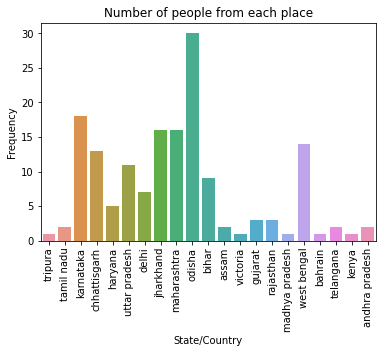

In [80]:
sns.countplot(x = 'state', data = dummy_df)
plt.title('Number of people from each place')
plt.ylabel('Frequency')
plt.xlabel('State/Country')
plt.xticks(rotation = 90)
plt.show();

### Location Preference | Pie Chart

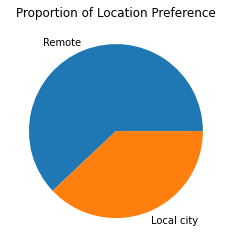

In [81]:
counts = dummy_df['location_pref'].value_counts()
plt.title('Proportion of Location Preference')
plt.pie(counts, labels = ['Remote', 'Local city'])
plt.show()

## Distribution for Skills &amp; Sub-Domains

### Defining the Functions to parse through each List value

In [82]:
#viewing the distribution of each feature in multi-label columns
def view_multi(given_column):
    
    #making dictionary
    def count(elements):
        if elements in col_dict:
            col_dict[elements] += 1
        else:
            col_dict.update({elements: 1})
    
    #freq check
    col_dict = {}
    for row in given_column:
        for words in row:
            count(words)
    
    #viewing the distribution
    keys = col_dict.keys()
    values = col_dict.values()
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.xticks(rotation=90)
    plt.bar(keys, values)

In [83]:
#viewing the distribution of each feature in multi-class columns
def view_single(given_column):
    
    #making dictionary
    def count(elements):
        if elements in col_dict:
            col_dict[elements] += 1
        else:
            col_dict.update({elements: 1})
    
    #freq check
    col_dict = {}
    for row in given_column:
        count(row)
    
    #viewing the distribution
    keys = col_dict.keys()
    values = col_dict.values()
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.xticks(rotation=90)
    plt.bar(keys, values)

### Current Skills Distribution

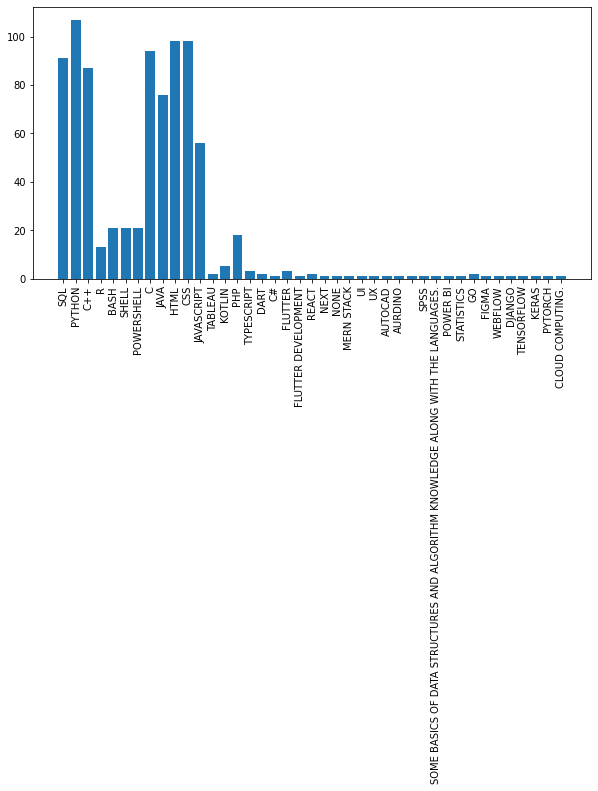

In [84]:
view_multi(dummy_df.split_curent_skills)

### Wanted Skills Distribution

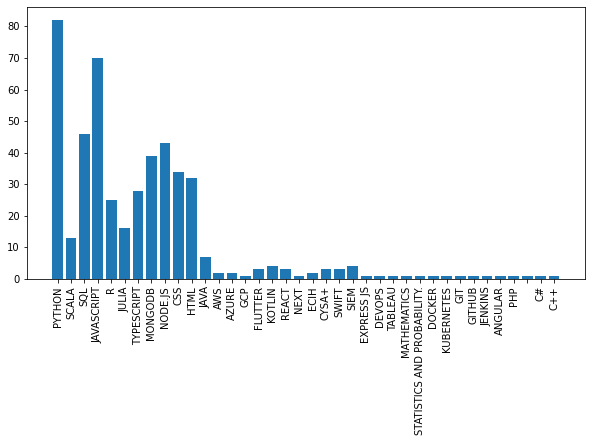

In [85]:
view_multi(dummy_df.wanted_skills)

### Sub-Domains Distribution

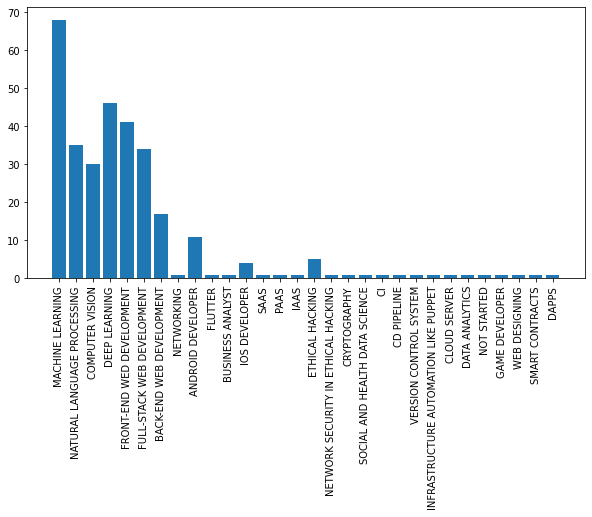

In [86]:
view_multi(dummy_df.split_fields)

## Filtering Feature Values before Encoding

### Invalid Values to Drop and Rename
1. **split_fields** - social and health data science, business analyst, data analytics,
    flutter, cloud server, not started, web designing, 
    NETWORK SECURITY IN ETHICAL HACKING -> NETWORK SECURITY
2. **wanted_skills** - none, mathematics, stats and prob, github -> git
3. **split_curent_skills** - statistics, none, data structures, ui ux, cloud computing, Mern stack -> mern, flutter dev -> flutter

### Defining Functions to get Row Indices &amp; Remove Values

In [87]:
#Lists of invalid values for each column
field_del_check = ['SOCIAL AND HEALTH DATA SCIENCE', 'BUSINESS ANALYST', 'DATA ANALYTICS',
'FLUTTER', 'CLOUD SERVER', 'NOT STARTED', 'WEB DESIGNING']
wanted_del_check = ['', 'MATHEMATICS', 'STATISTICS AND PROBABILITY']
current_del_check = ['STATISTICS', '', 'UI', 'UX', 'CLOUD COMPUTING.', 
'SOME BASICS OF DATA STRUCTURES AND ALGORITHM KNOWLEDGE ALONG WITH THE LANGUAGES.']

In [88]:
#to return a list of row indices when invalid value is found
def get_index(given_column, list_check):
    id_list = []
    for count, row in enumerate(given_column):
        for word in row:
            if word in list_check:
                id_list.append(count)
    
    return id_list

In [89]:
#to remove invalid value given the row index and word list
def del_item(df_column, index_list, remove_words):

    for count, row in enumerate(df_column):
        if count in index_list:
            for word in row:
                if word in remove_words:
                    row.remove(word)

### Removing Values from split_fields

In [90]:
field_idx = get_index(dummy_df.split_fields, field_del_check)
field_idx.remove(47)     #for these indices, entire row would be deleted
field_idx.remove(140)
field_idx

[34, 124, 126, 128, 147]

In [91]:
#executing the delete function
del_item(dummy_df.split_fields, field_idx, field_del_check)

In [92]:
#checking if values got deleted
print(get_index(dummy_df.split_fields, field_del_check))

[47, 140]


### Removing Values from wanted_skills

In [93]:
wanted_idx = get_index(dummy_df.wanted_skills, wanted_del_check)
wanted_idx.remove(121)
wanted_idx

[143]

In [94]:
#executing the delete function
del_item(dummy_df.wanted_skills, wanted_idx, wanted_del_check)

In [95]:
#checking if values got deleted
print(get_index(dummy_df.wanted_skills, wanted_del_check))

[121]


### Removing Values from split_curent_skills

In [96]:
current_idx = get_index(dummy_df.split_curent_skills, current_del_check)
current_idx.remove(116)
current_idx

[116, 122, 127, 128, 152]

In [97]:
#executing the delete function
del_item(dummy_df.split_curent_skills, current_idx, current_del_check)

In [98]:
#checking if values got deleted
print(get_index(dummy_df.wanted_skills, wanted_del_check))

[121]


### Deleting the 3 rows with Empty Columns after Filtering Invalids

Explore - 47, 140, 121 - delete rows

In [99]:
dummy_df.drop(dummy_df.index[[47,121,140]], axis=0, inplace=True)
dummy_df = dummy_df.reset_index(drop=True)
dummy_df.sample(5)

,age,done_project,project_desc,location_pref,wanted_skills,internships,split_curent_skills,split_fields,split_domains,split_peer_pref,split_goals,split_loc,city,state
22,20,No,NaN,Local city,"[JAVA, JAVASCRIPT, AWS, AZURE, GCP, HTML]",0,"[PYTHON, C++, JAVA]",[NETWORKING],[CLOUD COMPUTING],"[STUDENTS, WORKING PROFESSIONALS]",[FINDING AN INTERNSHIP],[Local city],bhubaneswar,odisha
129,20,Yes,YfS Website,Local city,"[HTML, CSS, JAVASCRIPT, PYTHON]",2,"[JAVASCRIPT, HTML, CSS, SQL, PYTHON, C++, JAVA]",[FRONT-END WED DEVELOPMENT],[WEB DEVELOPMENT],"[STUDENTS, WORKING PROFESSIONALS]",[HIGHER STUDIES],[Local city],cuttack,odisha
134,23,No,NaN,Remote,"[PYTHON, R, SQL]",0,"[JAVASCRIPT, HTML, CSS, SQL, PYTHON]",[MACHINE LEARNING],[DATA SCIENCE],"[STUDENTS, WORKING PROFESSIONALS]",[FINDING AN INTERNSHIP],[Remote],murum,maharashtra
119,20,No,NaN,Local city,[CYSA+],0,"[HTML, CSS, SQL, PYTHON, C++, C, JAVA]",[ETHICAL HACKING],[CYBER SECURITY],[STUDENTS],[HIGHER STUDIES],[Local city],bhubaneswar,odisha
116,20,No,NaN,Remote,"[JAVASCRIPT, NODE.JS]",0,"[HTML, CSS, SQL, C, JAVA]",[BACK-END WEB DEVELOPMENT],[WEB DEVELOPMENT],[WORKING PROFESSIONALS],[HIGHER STUDIES],[Remote],rourkela,odisha


### Renaming the Invalid Values from our Features

## Renaming entries

#### spilt_fields

In [100]:
split_fields_rename = 'NETWORK SECURITY IN ETHICAL HACKING'
for each_list in dummy_df['split_fields']:
    if split_fields_rename in each_list:
        ind = each_list.index(split_fields_rename)
        each_list[ind] = 'NETWORK SECURITY'

#### wanted_skills

In [101]:
wanted_skills_rename = 'GITHUB'
for each_list in dummy_df['wanted_skills']:
    if wanted_skills_rename in each_list:
        ind = each_list.index(wanted_skills_rename)
        each_list[ind] = 'GIT'

#### split_current_skills

In [102]:
split_current_skills_rename = ['MERN STACK','FLUTTER DEVELOPMENT']
for each_list in dummy_df['split_curent_skills']:
    if split_current_skills_rename[0] in each_list:
        ind = each_list.index(split_current_skills_rename[0])
        each_list[ind] = 'MERN'
        
    if split_current_skills_rename[1] in each_list:
        ind = each_list.index(split_current_skills_rename[1])
        each_list[ind] = 'FLUTTER'
    

    

### web development areas

In [103]:
for each_list in dummy_df['split_fields']:
    if 'FRONT-END WED DEVELOPMENT' in each_list:
        ind = each_list.index('FRONT-END WED DEVELOPMENT')
        each_list[ind] = 'FRONT END WEB DEVELOPMENT'

for each_list in dummy_df['split_fields']:
    if 'FULL-STACK WEB DEVELOPMENT' in each_list:
        ind = each_list.index('FULL-STACK WEB DEVELOPMENT')
        each_list[ind] = 'FULL STACK WEB DEVELOPMENT'

for each_list in dummy_df['split_fields']:
    if 'BACK-END WEB DEVELOPMENT' in each_list:
        ind = each_list.index('BACK-END WEB DEVELOPMENT')
        each_list[ind] = 'BACK END WEB DEVELOPMENT'

### Final Distribution of Skills &amp; Sub-Domains after Filtering

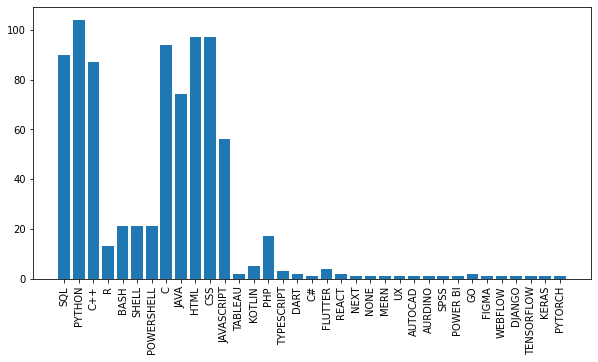

In [104]:
view_multi(dummy_df.split_curent_skills)

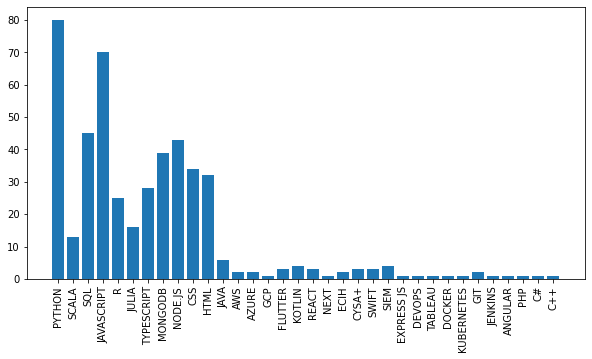

In [105]:
view_multi(dummy_df.wanted_skills)

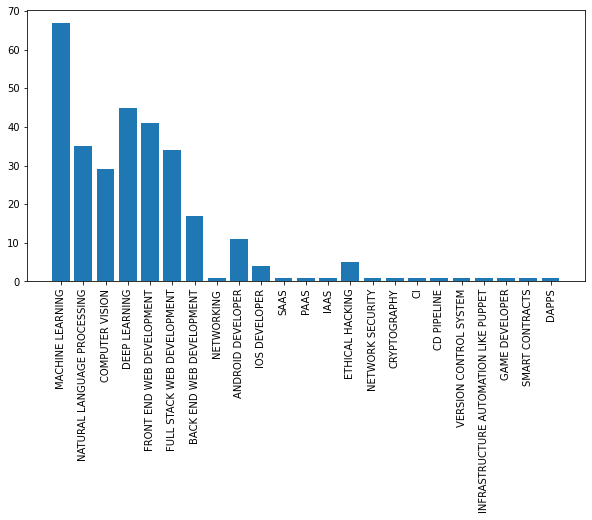

In [106]:
view_multi(dummy_df.split_fields)

## Integrating new Project Desc &amp; Reordering DF

### Integrating the cleaned project_desc column

In [107]:
dummy_df.columns

Index(['age', 'done_project', 'project_desc', 'location_pref', 'wanted_skills',
       'internships', 'split_curent_skills', 'split_fields', 'split_domains',
       'split_peer_pref', 'split_goals', 'split_loc', 'city', 'state'],
      dtype='object')

In [108]:
updated_projects = has_project_updated['Which is the best project you have worked on related to your domain of interest and why?']
updated_projects = updated_projects.to_numpy()

In [109]:
#indexes to be deleted = 0, 1, 2

updated_projects = np.delete(updated_projects, [0,1,2]) #removing fake entries
updated_projects = np.delete(updated_projects, [47,121,140]) #removing dropped rows


In [110]:
dummy_df.drop(columns=['project_desc'], axis=1, inplace=True)
dummy_df['projects_desc'] = updated_projects

In [111]:
dummy_df.columns

Index(['age', 'done_project', 'location_pref', 'wanted_skills', 'internships',
       'split_curent_skills', 'split_fields', 'split_domains',
       'split_peer_pref', 'split_goals', 'split_loc', 'city', 'state',
       'projects_desc'],
      dtype='object')

### Reordering the Final cleaned DF

In [112]:
#correcting the column name for current skills feature
dummy_df.rename({'split_curent_skills': 'current_skills'}, axis=1, inplace=True)

In [113]:
dummy_df.columns

Index(['age', 'done_project', 'location_pref', 'wanted_skills', 'internships',
       'current_skills', 'split_fields', 'split_domains', 'split_peer_pref',
       'split_goals', 'split_loc', 'city', 'state', 'projects_desc'],
      dtype='object')

Reordering the columns of final DF

In [114]:
cols = dummy_df.columns.tolist()
cols

['age',
 'done_project',
 'location_pref',
 'wanted_skills',
 'internships',
 'current_skills',
 'split_fields',
 'split_domains',
 'split_peer_pref',
 'split_goals',
 'split_loc',
 'city',
 'state',
 'projects_desc']

In [115]:
cols = ['age', 'city', 'state', 'current_skills', 'split_domains', 'split_fields',
'wanted_skills', 'internships', 'done_project', 'projects_desc', 'split_goals',
'split_peer_pref', 'location_pref']
dummy_df = dummy_df[cols]
dummy_df.head(5)

,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
0,22,agartala,tripura,"[SQL, PYTHON, C++, R]",[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING...","[PYTHON, SCALA, SQL]",0,No,NaN,[FINDING AN INTERNSHIP],[STUDENTS],Remote
1,19,chennai,tamil nadu,"[SQL, PYTHON, BASH, SHELL, POWERSHELL, C++, C,...",[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[PYTHON, JAVASCRIPT, R]",1,Yes,It's related to recommendation systems in Mac...,[RESEARCH PROJECT],[STUDENTS],Local city
2,21,bengaluru,karnataka,"[HTML, CSS, SQL, PYTHON, C++, C, JAVA]",[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[R, SQL, JULIA]",1,Yes,I have worked on data analysis of IT jobs.It i...,[FINDING A JOB],[WORKING PROFESSIONALS],Remote
3,20,raigarh,chhattisgarh,[PYTHON],[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]","[PYTHON, SQL]",0,Yes,Recommendations system.,[FINDING AN INTERNSHIP],[STUDENTS],Remote
4,22,sonipat,haryana,"[JAVASCRIPT, SQL, PYTHON]",[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]",[SQL],0,Yes,I built an emotions detection model which can ...,[UPSKILL],[WORKING PROFESSIONALS],Remote


# 4. Data Encoding

In [116]:
encoded_df = dummy_df.copy()

In [117]:
#dictionary storing the unique labels of all encoded feature columns
feature_labels = {}

In [118]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["wanted_skills"])
feature_labels["wanted_skills"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["wan_skills"] = 0
encoded_df.wan_skills = [i for i in encoded]

34
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['ANGULAR' 'AWS' 'AZURE' 'C#' 'C++' 'CSS' 'CYSA+' 'DEVOPS' 'DOCKER' 'ECIH'
 'EXPRESS JS' 'FLUTTER' 'GCP' 'GIT' 'HTML' 'JAVA' 'JAVASCRIPT' 'JENKINS'
 'JULIA' 'KOTLIN' 'KUBERNETES' 'MONGODB' 'NEXT' 'NODE.JS' 'PHP' 'PYTHON'
 'R' 'REACT' 'SCALA' 'SIEM' 'SQL' 'SWIFT' 'TABLEAU' 'TYPESCRIPT']


In [119]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["split_domains"])
feature_labels["domains"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["domains"] = 0
encoded_df.domains = [i for i in encoded]

7
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
['APP DEVELOPMENT' 'BLOCKCHAIN DEVELOPMENT' 'CLOUD COMPUTING'
 'CYBER SECURITY' 'DATA SCIENCE' 'DEVOPS' 'WEB DEVELOPMENT']


In [120]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["split_fields"])
feature_labels["subdomains"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["fields"] = 0
encoded_df.fields = [i for i in encoded]

23
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
['ANDROID DEVELOPER' 'BACK END WEB DEVELOPMENT' 'CD PIPELINE' 'CI'
 'COMPUTER VISION' 'CRYPTOGRAPHY' 'DAPPS' 'DEEP LEARNING'
 'ETHICAL HACKING' 'FRONT END WEB DEVELOPMENT'
 'FULL STACK WEB DEVELOPMENT' 'GAME DEVELOPER' 'IAAS'
 'INFRASTRUCTURE AUTOMATION LIKE PUPPET' 'IOS DEVELOPER'
 'MACHINE LEARNING' 'NATURAL LANGUAGE PROCESSING' 'NETWORK SECURITY'
 'NETWORKING' 'PAAS' 'SAAS' 'SMART CONTRACTS' 'VERSION CONTROL SYSTEM']


In [121]:
encoded_df["split_loc"] = [[x] for x in encoded_df.location_pref]
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["split_loc"])
feature_labels["location_pref"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["location_pref"] = 0
encoded_df.location_pref = [i for i in encoded]

2
[[0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 

In [122]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["split_peer_pref"])
feature_labels["peer_pref"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["peer_pref"] = 0
encoded_df.peer_pref = [i for i in encoded]

2
[[1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 

In [123]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["split_goals"])
feature_labels["goals"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["goals"] = 0
encoded_df.goals = [i for i in encoded]

5
[[0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 

In [124]:
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(encoded_df["current_skills"])
feature_labels["current_skills"] = list(mlb.classes_)
print(len(encoded[0]))
print(encoded)
print(mlb.classes_)
encoded_df["curr_skills"] = 0
encoded_df.curr_skills = [i for i in encoded]

35
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['AURDINO' 'AUTOCAD' 'BASH' 'C' 'C#' 'C++' 'CSS' 'DART' 'DJANGO' 'FIGMA'
 'FLUTTER' 'GO' 'HTML' 'JAVA' 'JAVASCRIPT' 'KERAS' 'KOTLIN' 'MERN' 'NEXT'
 'NONE' 'PHP' 'POWER BI' 'POWERSHELL' 'PYTHON' 'PYTORCH' 'R' 'REACT'
 'SHELL' 'SPSS' 'SQL' 'TABLEAU' 'TENSORFLOW' 'TYPESCRIPT' 'UX' 'WEBFLOW']


In [125]:
encoded_df.columns

In [126]:
feature_labels

{'wanted_skills': ['ANGULAR',
  'AWS',
  'AZURE',
  'C#',
  'C++',
  'CSS',
  'CYSA+',
  'DEVOPS',
  'DOCKER',
  'ECIH',
  'EXPRESS JS',
  'FLUTTER',
  'GCP',
  'GIT',
  'HTML',
  'JAVA',
  'JAVASCRIPT',
  'JENKINS',
  'JULIA',
  'KOTLIN',
  'KUBERNETES',
  'MONGODB',
  'NEXT',
  'NODE.JS',
  'PHP',
  'PYTHON',
  'R',
  'REACT',
  'SCALA',
  'SIEM',
  'SQL',
  'SWIFT',
  'TABLEAU',
  'TYPESCRIPT'],
 'domains': ['APP DEVELOPMENT',
  'BLOCKCHAIN DEVELOPMENT',
  'CLOUD COMPUTING',
  'CYBER SECURITY',
  'DATA SCIENCE',
  'DEVOPS',
  'WEB DEVELOPMENT'],
 'subdomains': ['ANDROID DEVELOPER',
  'BACK END WEB DEVELOPMENT',
  'CD PIPELINE',
  'CI',
  'COMPUTER VISION',
  'CRYPTOGRAPHY',
  'DAPPS',
  'DEEP LEARNING',
  'ETHICAL HACKING',
  'FRONT END WEB DEVELOPMENT',
  'FULL STACK WEB DEVELOPMENT',
  'GAME DEVELOPER',
  'IAAS',
  'INFRASTRUCTURE AUTOMATION LIKE PUPPET',
  'IOS DEVELOPER',
  'MACHINE LEARNING',
  'NATURAL LANGUAGE PROCESSING',
  'NETWORK SECURITY',
  'NETWORKING',
  'PAAS',
  'SA

In [127]:
encoded_df.drop(['current_skills', 'split_domains', 'split_fields', 'wanted_skills', 'split_goals', 'split_peer_pref', 'split_loc'], axis=1, inplace=True)

In [128]:
encoded_df

,age,city,state,internships,done_project,projects_desc,location_pref,wan_skills,domains,fields,peer_pref,goals,curr_skills
0,22,agartala,tripura,0,No,NaN,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,19,chennai,tamil nadu,1,Yes,It's related to recommendation systems in Mac...,"[1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 0, 0, 1, 0]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,21,bengaluru,karnataka,1,Yes,I have worked on data analysis of IT jobs.It i...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3,20,raigarh,chhattisgarh,0,Yes,Recommendations system.,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,22,sonipat,haryana,0,Yes,I built an emotions detection model which can ...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
5,20,ghaziabad,uttar pradesh,2,Yes,"Mediwiz, a medicine identifier which helps ide...","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,20,new delhi,delhi,0,Yes,I worked on a topic modeling project wherein I...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,21,ranchi,jharkhand,>4,Yes,Multilingual Text Classifier using mBERT with ...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,22,faridabad,haryana,0,No,NaN,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,19,ambala,haryana,0,No,NaN,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [129]:
encoded_df.columns

Index(['age', 'city', 'state', 'internships', 'done_project', 'projects_desc',
       'location_pref', 'wan_skills', 'domains', 'fields', 'peer_pref',
       'goals', 'curr_skills'],
      dtype='object')

In [130]:
encoded_df.shape

(155, 13)

In [131]:
users = np.arange(1,156)
users

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

In [132]:
encoded_df.insert(0, 'user_id', users)
encoded_df.head(10)

,user_id,age,city,state,internships,done_project,projects_desc,location_pref,wan_skills,domains,fields,peer_pref,goals,curr_skills
0,1,22,agartala,tripura,0,No,NaN,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,19,chennai,tamil nadu,1,Yes,It's related to recommendation systems in Mac...,"[1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 0, 0, 1, 0]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,3,21,bengaluru,karnataka,1,Yes,I have worked on data analysis of IT jobs.It i...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3,4,20,raigarh,chhattisgarh,0,Yes,Recommendations system.,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,22,sonipat,haryana,0,Yes,I built an emotions detection model which can ...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
5,6,20,ghaziabad,uttar pradesh,2,Yes,"Mediwiz, a medicine identifier which helps ide...","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,7,20,new delhi,delhi,0,Yes,I worked on a topic modeling project wherein I...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,8,21,ranchi,jharkhand,>4,Yes,Multilingual Text Classifier using mBERT with ...,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]","[0, 0, 1, 0, 0]","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,9,22,faridabad,haryana,0,No,NaN,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,10,19,ambala,haryana,0,No,NaN,"[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1]","[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [133]:
dummy_df.columns

Index(['age', 'city', 'state', 'current_skills', 'split_domains',
       'split_fields', 'wanted_skills', 'internships', 'done_project',
       'projects_desc', 'split_goals', 'split_peer_pref', 'location_pref'],
      dtype='object')

# 5. Content-based Recommendations with Cosine Similarity

## Making&nbsp;the&nbsp;features_df

In [134]:
pd.options.mode.chained_assignment = None
users = np.arange(0,155)
dummy_df.insert(0, 'user_id', users)
dummy_df.sample(5)

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
154,154,18,ponnur,andhra pradesh,"[PYTHON, C++, JAVA]",[BLOCKCHAIN DEVELOPMENT],"[SMART CONTRACTS, DAPPS]","[JAVA, C++, JAVASCRIPT]",0,No,NaN,[HIGHER STUDIES],[STUDENTS],Local city
9,9,19,ambala,haryana,"[HTML, CSS, PYTHON, C++, C]",[DATA SCIENCE],[MACHINE LEARNING],"[SCALA, R, SQL, JULIA]",0,No,NaN,[FINDING A JOB],"[STUDENTS, WORKING PROFESSIONALS]",Remote
85,85,20,berhampore,west bengal,"[JAVASCRIPT, HTML, CSS, SQL, PYTHON, BASH, SHE...",[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[PYTHON, JAVASCRIPT, R, SQL]",0,Yes,NaN,[FINDING AN INTERNSHIP],"[STUDENTS, WORKING PROFESSIONALS]",Local city
67,67,20,brahmapur,odisha,"[HTML, CSS, SQL, C++, C, JAVA, KOTLIN, DART]",[APP DEVELOPMENT],"[ANDROID DEVELOPER, IOS DEVELOPER]","[JAVASCRIPT, SWIFT]",1,Yes,NaN,[FINDING A JOB],[WORKING PROFESSIONALS],Remote
135,135,24,patna,bihar,"[JAVASCRIPT, HTML, CSS, SQL, JAVA]",[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[TYPESCRIPT, MONGODB, NODE.JS]",0,No,NaN,[FINDING A JOB],[WORKING PROFESSIONALS],Local city


In [135]:
features = ['user_id']

#features = ['movie name', 'director', 'genre', 'actor'] ~ synonymous

features_df = dummy_df[features]
features_df.reset_index(drop=True)
features_df.sample(10)

,user_id
6,6
107,107
121,121
140,140
90,90
56,56
7,7
136,136
108,108
85,85


In [136]:
def listtostringtojoin(mylist):
    req_list = []
    for i in range(len(mylist)):
        x = mylist[i][0].lower()
        x = ''.join(x.split())
        req_list.append(x)

    return req_list


new_string = listtostringtojoin(dummy_df['split_domains'])

features_df['domains'] = new_string

In [137]:
def listtojoin(mylist):
    req_list = []
    for i in range(len(mylist)):
        l = []
        for j in range(len(mylist[i])):
            x = mylist[i][j].lower()
            x = ''.join(x.split())
            l.append(x)
        req_list.append(l)

    return req_list

features_df['subdomain'] = listtojoin(dummy_df['split_fields'])
features_df['wanted_skills'] = listtojoin(dummy_df['wanted_skills'])

In [138]:
features_df.sample(10)

,user_id,domains,subdomain,wanted_skills
139,139,datascience,"[machinelearning, deeplearning, naturallanguag...","[python, sql]"
28,28,webdevelopment,[frontendwebdevelopment],"[javascript, python]"
133,133,datascience,"[machinelearning, computervision]",[python]
27,27,webdevelopment,[frontendwebdevelopment],"[html, css, javascript, python, mongodb, node.js]"
42,42,webdevelopment,[frontendwebdevelopment],"[python, typescript]"
109,109,datascience,"[machinelearning, deeplearning]","[python, javascript, scala, r, sql, julia, tab..."
134,134,datascience,[machinelearning],"[python, r, sql]"
59,59,datascience,"[machinelearning, deeplearning, naturallanguag...","[python, sql]"
142,142,appdevelopment,"[androiddeveloper, gamedeveloper]","[javascript, swift, kotlin, c#]"
128,128,webdevelopment,"[frontendwebdevelopment, backendwebdevelopment]","[html, css, javascript, python]"


#### Renaming a few things for uniformity

In [139]:
for each_list in features_df['wanted_skills']:
    if 'cysa+' in each_list:
        ind = each_list.index('cysa+')
        each_list[ind] = 'cysaplus'

for each_list in features_df['wanted_skills']:
    if 'node.js' in each_list:
        ind = each_list.index('node.js')
        each_list[ind] = 'nodedotjs'

for each_list in features_df['wanted_skills']:
    if 'c#' in each_list:
        ind = each_list.index('c#')
        each_list[ind] = 'chash'

for each_list in features_df['wanted_skills']:
    if 'c++' in each_list:
        ind = each_list.index('c++')
        each_list[ind] = 'cpp'

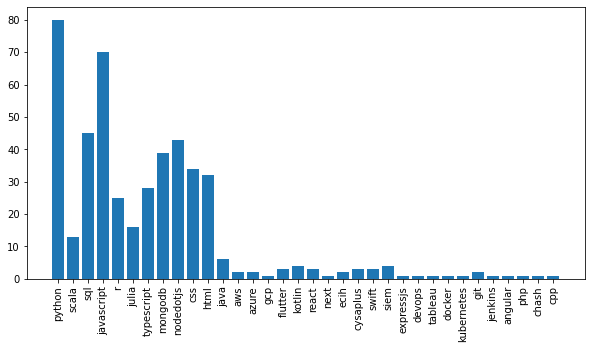

In [140]:
view_multi(features_df['wanted_skills'])

In [141]:
#features = ['movie name', 'director', 'genre', 'actor'] ~ synonymous

features_df.sample(10)

,user_id,domains,subdomain,wanted_skills
89,89,datascience,"[machinelearning, deeplearning, computervision]",[python]
127,127,datascience,"[machinelearning, deeplearning, naturallanguag...","[r, julia]"
13,13,webdevelopment,[frontendwebdevelopment],"[python, typescript, mongodb, nodedotjs]"
74,74,datascience,"[machinelearning, deeplearning, computervision]","[python, sql]"
87,87,appdevelopment,[androiddeveloper],[java]
64,64,datascience,"[machinelearning, deeplearning, naturallanguag...","[python, javascript, sql]"
139,139,datascience,"[machinelearning, deeplearning, naturallanguag...","[python, sql]"
94,94,datascience,[machinelearning],"[python, javascript, scala, r, sql, julia]"
136,136,datascience,"[machinelearning, deeplearning, naturallanguag...","[python, javascript]"
30,30,datascience,[naturallanguageprocessing],[python]


## Recommendations using BOW

In [142]:
features_df.set_index("user_id", inplace = True)
features_df.head()

,domains,subdomain,wanted_skills
user_id,,,
0,datascience,"[machinelearning, naturallanguageprocessing, c...","[python, scala, sql]"
1,datascience,"[machinelearning, deeplearning]","[python, javascript, r]"
2,datascience,"[machinelearning, deeplearning, naturallanguag...","[r, sql, julia]"
3,datascience,"[machinelearning, naturallanguageprocessing]","[python, sql]"
4,datascience,"[machinelearning, naturallanguageprocessing]",[sql]


In [143]:
#converting all list type features to strings
def convertlistostring(column):
    list_string = []
    for item in column:
        sent = " ".join(item)
        list_string.append(sent)
    return list_string

In [144]:
features_df.subdomain = convertlistostring(features_df.subdomain)
features_df.wanted_skills = convertlistostring(features_df.wanted_skills)

In [145]:
features_df.sample(3)

,domains,subdomain,wanted_skills
user_id,,,
59,datascience,machinelearning deeplearning naturallanguagepr...,python sql
1,datascience,machinelearning deeplearning,python javascript r
113,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,python typescript mongodb nodedotjs


In [146]:
def combined_features(row):
    return row['domains']+" "+row['subdomain']+" "+row['wanted_skills']
features_df["combined_features"] = features_df.apply(combined_features, axis =1)

In [147]:
features_df

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
0,datascience,machinelearning naturallanguageprocessing comp...,python scala sql,datascience machinelearning naturallanguagepro...
1,datascience,machinelearning deeplearning,python javascript r,datascience machinelearning deeplearning pytho...
2,datascience,machinelearning deeplearning naturallanguagepr...,r sql julia,datascience machinelearning deeplearning natur...
3,datascience,machinelearning naturallanguageprocessing,python sql,datascience machinelearning naturallanguagepro...
4,datascience,machinelearning naturallanguageprocessing,sql,datascience machinelearning naturallanguagepro...
5,datascience,machinelearning deeplearning naturallanguagepr...,python,datascience machinelearning deeplearning natur...
6,datascience,machinelearning deeplearning naturallanguagepr...,javascript scala julia,datascience machinelearning deeplearning natur...
7,datascience,machinelearning deeplearning naturallanguagepr...,python r sql julia,datascience machinelearning deeplearning natur...
8,datascience,machinelearning naturallanguageprocessing,python r sql julia,datascience machinelearning naturallanguagepro...


In [148]:
# features_df['bag_of_words'] = ''
# columns =  features_df.columns

# for index, row in features_df.iterrows():
#     words = ''
#     for col in columns:
#         if col != 'domain':
#             words = words + ''.join(row[col]) + ' '
#         else:
#             words = words + row[col] + ' '
#         row['bag_of_words'] = words

In [149]:
from scipy.spatial import distance
distance.cosine([1, 1, 0], [0, 1, 0], [0.6, 0.4, 0.2])
#0.29289321881345254

0.3675444679663241

In [150]:
#features_df.drop(columns = [col for col in features_df.columns if col != 'combined_features'], inplace = True)

In [151]:
print(features_df.combined_features[50:60])

user_id
50    webdevelopment frontendwebdevelopment backendw...
51              cloudcomputing saas paas iaas aws azure
52           cybersecurity ethicalhacking ecih cysaplus
53               appdevelopment androiddeveloper kotlin
54                   datascience machinelearning python
55              appdevelopment androiddeveloper flutter
56    webdevelopment fullstackwebdevelopment typescr...
57    datascience machinelearning deeplearning pytho...
58    webdevelopment fullstackwebdevelopment css jav...
59    datascience machinelearning deeplearning natur...
Name: combined_features, dtype: object


In [152]:
features_df.sample(5)

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
110,datascience,machinelearning computervision,python,datascience machinelearning computervision python
45,appdevelopment,androiddeveloper,kotlin,appdevelopment androiddeveloper kotlin
131,datascience,machinelearning,python,datascience machinelearning python
124,devops,ci cdpipeline versioncontrolsystem infrastruct...,docker kubernetes git git jenkins,devops ci cdpipeline versioncontrolsystem infr...
152,datascience,machinelearning deeplearning,scala sql julia,datascience machinelearning deeplearning scala...


In [153]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [154]:
features_df

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
0,datascience,machinelearning naturallanguageprocessing comp...,python scala sql,datascience machinelearning naturallanguagepro...
1,datascience,machinelearning deeplearning,python javascript r,datascience machinelearning deeplearning pytho...
2,datascience,machinelearning deeplearning naturallanguagepr...,r sql julia,datascience machinelearning deeplearning natur...
3,datascience,machinelearning naturallanguageprocessing,python sql,datascience machinelearning naturallanguagepro...
4,datascience,machinelearning naturallanguageprocessing,sql,datascience machinelearning naturallanguagepro...
5,datascience,machinelearning deeplearning naturallanguagepr...,python,datascience machinelearning deeplearning natur...
6,datascience,machinelearning deeplearning naturallanguagepr...,javascript scala julia,datascience machinelearning deeplearning natur...
7,datascience,machinelearning deeplearning naturallanguagepr...,python r sql julia,datascience machinelearning deeplearning natur...
8,datascience,machinelearning naturallanguageprocessing,python r sql julia,datascience machinelearning naturallanguagepro...


In [155]:
count = CountVectorizer()
count_matrix = count.fit_transform(features_df['combined_features'])

count_matrix

<155x62 sparse matrix of type '<class 'numpy.int64'>'
	with 901 stored elements in Compressed Sparse Row format>

In [156]:
count_matrix.shape

(155, 62)

In [157]:
cosine_sim = cosine_similarity(count_matrix, count_matrix,)
cosine_sim

array([[1.        , 0.50709255, 0.6172134 , ..., 0.6172134 , 0.        ,
        0.        ],
       [0.50709255, 1.        , 0.54772256, ..., 0.54772256, 0.16903085,
        0.18257419],
       [0.6172134 , 0.54772256, 1.        , ..., 0.83333333, 0.        ,
        0.        ],
       ...,
       [0.6172134 , 0.54772256, 0.83333333, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.16903085, 0.        , ..., 0.        , 1.        ,
        0.15430335],
       [0.        , 0.18257419, 0.        , ..., 0.        , 0.15430335,
        1.        ]])

In [158]:
def recommendation(user_id, cosine_sim = cosine_sim):
    recommended_users = []

    idx = user_id
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = list(score_series.iloc[1:11].index)

    for i in top_10:
        recommended_users.append(list(features_df.index)[i])

    return recommended_users

In [159]:
recommendation(108)

[83, 39, 107, 100, 33, 29, 47, 153, 114, 21]

In [160]:
dummy_df.loc[dummy_df['user_id'] == 108]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
108,108,20,bengaluru,karnataka,"[JAVASCRIPT, HTML, CSS, SQL, PHP, C, JAVA]",[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO...",1,Yes,College portal,[FINDING A JOB],[WORKING PROFESSIONALS],Local city


In [161]:
dummy_df.loc[dummy_df['user_id'] == 40]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
40,40,20,pune,maharashtra,"[JAVASCRIPT, HTML, CSS, SQL, PHP, C++, C]",[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, FULL STACK WEB DEV...","[HTML, CSS, JAVASCRIPT, MONGODB, NODE.JS]",0,Yes,At Present I have worked on a Frontend ecommer...,[FINDING AN INTERNSHIP],"[STUDENTS, WORKING PROFESSIONALS]",Remote


In [162]:
recommendation(60)

[153, 58, 40, 107, 63, 23, 99, 41, 72, 39]

In [163]:
dummy_df.loc[dummy_df['user_id'] == 60]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
60,60,20,ranchi,jharkhand,"[JAVASCRIPT, HTML, CSS]",[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]",0,No,NaN,[FINDING AN INTERNSHIP],[STUDENTS],Remote


In [164]:
dummy_df.loc[dummy_df['user_id'] == 141]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
141,141,20,raigarh,chhattisgarh,"[HTML, CSS, PYTHON, C, JAVA]",[DATA SCIENCE],[MACHINE LEARNING],"[PYTHON, SQL]",0,No,NaN,[RESEARCH PROJECT],[WORKING PROFESSIONALS],Local city


In [165]:
def recommendation_sample(user_id, cosine_sim = cosine_sim):
    recommended_users = []

    idx = user_id
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = list(score_series.iloc[1:11].index)

    return top_10

In [166]:
def df_recommended_users(user_id, cosine_sim = cosine_sim):
    feature_list = ['split_domains', 'split_fields', 'wanted_skills']
    rec_df = pd.DataFrame(columns=feature_list)
    idx = user_id

    def df_users(rec_list):
        rec_df.loc[user_id] = dummy_df.loc[user_id, feature_list]
        for each_id in rec_list:
            rec_df.loc[each_id] = dummy_df.loc[each_id, feature_list]
        

    
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = list(score_series.iloc[1:11].index)
    df_users(top_10)
    return rec_df

In [167]:
#Web development
recommendation_sample(33)

[100, 33, 36, 21, 114, 108, 39, 83, 143, 27]

In [168]:
dummy_df.loc[dummy_df['user_id'] == 33]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
33,33,19,jamshedpur,jharkhand,"[HTML, CSS, JAVA]",[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO...",0,Yes,NaN,[FINDING AN INTERNSHIP],"[STUDENTS, WORKING PROFESSIONALS]",Local city


In [169]:
dummy_df.loc[dummy_df['user_id'] == 29]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
29,29,22,ahmedabad,gujarat,"[JAVASCRIPT, HTML, CSS, SQL, PYTHON, BASH, SHE...",[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO...",3,Yes,NaN,[FINDING A JOB],"[STUDENTS, WORKING PROFESSIONALS]",Local city


In [170]:
test = df_recommended_users(33)
test

,split_domains,split_fields,wanted_skills
33,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
100,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
36,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, TYPESCRIPT, MONGODB, N..."
21,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, TYPESCRIPT, MONGODB, N..."
114,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
108,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
39,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
83,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
143,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON]"
27,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON, MONGODB, NODE.JS]"


In [171]:
#Cyber security
recommendation_sample(68)

[148, 71, 97, 119, 52, 105, 99, 100, 101, 102]

In [172]:
dummy_df.loc[dummy_df['user_id'] == 68]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
68,68,18,bengaluru,karnataka,[C],[CYBER SECURITY],[NETWORK SECURITY],[SIEM],0,No,NaN,[UPSKILL],[STUDENTS],Remote


In [173]:
dummy_df.loc[dummy_df['user_id'] == 148]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
148,148,20,bengaluru,karnataka,"[PYTHON, JAVA]",[CYBER SECURITY],[ETHICAL HACKING],[SIEM],0,No,NaN,[UPSKILL],[STUDENTS],Remote


In [174]:
test = df_recommended_users(68)
test

,split_domains,split_fields,wanted_skills
68,[CYBER SECURITY],[NETWORK SECURITY],[SIEM]
148,[CYBER SECURITY],[ETHICAL HACKING],[SIEM]
71,[CYBER SECURITY],[ETHICAL HACKING],[SIEM]
97,[CYBER SECURITY],[ETHICAL HACKING],"[ECIH, CYSA+, SIEM]"
119,[CYBER SECURITY],[ETHICAL HACKING],[CYSA+]
52,[CYBER SECURITY],[ETHICAL HACKING],"[ECIH, CYSA+]"
105,[DATA SCIENCE],[MACHINE LEARNING],[JAVASCRIPT]
99,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON]"
100,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
101,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[TYPESCRIPT, MONGODB, NODE.JS]"


In [175]:
#Cloud computing
recommendation_sample(22)

[51, 121, 103, 154, 41, 60, 63, 72, 23, 99]

In [176]:
dummy_df.loc[dummy_df['user_id'] == 22]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
22,22,20,bhubaneswar,odisha,"[PYTHON, C++, JAVA]",[CLOUD COMPUTING],[NETWORKING],"[JAVA, JAVASCRIPT, AWS, AZURE, GCP, HTML]",0,No,NaN,[FINDING AN INTERNSHIP],"[STUDENTS, WORKING PROFESSIONALS]",Local city


In [177]:
dummy_df.loc[dummy_df['user_id'] == 51]

,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
51,51,20,kolkata,west bengal,"[JAVASCRIPT, HTML, CSS, SQL, BASH, SHELL, POWE...",[CLOUD COMPUTING],"[SAAS, PAAS, IAAS]","[AWS, AZURE]",2,Yes,"Student Attendance System , It was great to wo...",[RESEARCH PROJECT],"[STUDENTS, WORKING PROFESSIONALS]",Remote


In [178]:
test = df_recommended_users(22)
test

,split_domains,split_fields,wanted_skills
22,[CLOUD COMPUTING],[NETWORKING],"[JAVA, JAVASCRIPT, AWS, AZURE, GCP, HTML]"
51,[CLOUD COMPUTING],"[SAAS, PAAS, IAAS]","[AWS, AZURE]"
121,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT]"
103,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT]"
154,[BLOCKCHAIN DEVELOPMENT],"[SMART CONTRACTS, DAPPS]","[JAVA, C++, JAVASCRIPT]"
41,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON]"
60,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"
63,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"
72,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"
23,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"


In [179]:
#Data Science
test = df_recommended_users(152)
test

,split_domains,split_fields,wanted_skills
152,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[SCALA, SQL, JULIA]"
149,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[JAVASCRIPT, SCALA, R, SQL, JULIA]"
9,[DATA SCIENCE],[MACHINE LEARNING],"[SCALA, R, SQL, JULIA]"
2,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[R, SQL, JULIA]"
95,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[JAVASCRIPT, SCALA, JULIA]"
81,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[JAVASCRIPT, SCALA, SQL]"
122,[DATA SCIENCE],[MACHINE LEARNING],"[SQL, JULIA]"
109,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[PYTHON, JAVASCRIPT, SCALA, R, SQL, JULIA, TAB..."
96,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[PYTHON, JAVASCRIPT, SCALA, R, SQL, JULIA]"
25,[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING, NATURAL LANG...","[SCALA, JULIA]"


In [180]:
#App Development
test = df_recommended_users(142)
test

,split_domains,split_fields,wanted_skills
142,[APP DEVELOPMENT],"[ANDROID DEVELOPER, GAME DEVELOPER]","[JAVASCRIPT, SWIFT, KOTLIN, C#]"
67,[APP DEVELOPMENT],"[ANDROID DEVELOPER, IOS DEVELOPER]","[JAVASCRIPT, SWIFT]"
45,[APP DEVELOPMENT],[ANDROID DEVELOPER],[KOTLIN]
53,[APP DEVELOPMENT],[ANDROID DEVELOPER],[KOTLIN]
111,[APP DEVELOPMENT],"[ANDROID DEVELOPER, IOS DEVELOPER]",[SWIFT]
49,[APP DEVELOPMENT],"[ANDROID DEVELOPER, IOS DEVELOPER]","[JAVA, KOTLIN, FLUTTER]"
87,[APP DEVELOPMENT],[ANDROID DEVELOPER],[JAVA]
55,[APP DEVELOPMENT],[ANDROID DEVELOPER],[FLUTTER]
34,[APP DEVELOPMENT],[ANDROID DEVELOPER],[FLUTTER]
118,[APP DEVELOPMENT],[ANDROID DEVELOPER],[JAVA]


In [181]:
#Blockchain
test = df_recommended_users(154)
test

,split_domains,split_fields,wanted_skills
154,[BLOCKCHAIN DEVELOPMENT],"[SMART CONTRACTS, DAPPS]","[JAVA, C++, JAVASCRIPT]"
77,[BLOCKCHAIN DEVELOPMENT],[CRYPTOGRAPHY],"[JAVASCRIPT, PYTHON]"
22,[CLOUD COMPUTING],[NETWORKING],"[JAVA, JAVASCRIPT, AWS, AZURE, GCP, HTML]"
118,[APP DEVELOPMENT],[ANDROID DEVELOPER],[JAVA]
87,[APP DEVELOPMENT],[ANDROID DEVELOPER],[JAVA]
105,[DATA SCIENCE],[MACHINE LEARNING],[JAVASCRIPT]
16,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],[JAVASCRIPT]
28,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[JAVASCRIPT, PYTHON]"
66,[DATA SCIENCE],[MACHINE LEARNING],"[PYTHON, JAVASCRIPT]"
116,[WEB DEVELOPMENT],[BACK END WEB DEVELOPMENT],"[JAVASCRIPT, NODE.JS]"


In [182]:
#DevOps
test = df_recommended_users(124)
test

,split_domains,split_fields,wanted_skills
124,[DEVOPS],"[CI, CD PIPELINE, VERSION CONTROL SYSTEM, INFR...","[DOCKER, KUBERNETES, GIT, GIT, JENKINS]"
76,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[MONGODB, NODE.JS, EXPRESS JS, DEVOPS]"
0,[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING...","[PYTHON, SCALA, SQL]"
106,[DATA SCIENCE],"[MACHINE LEARNING, NATURAL LANGUAGE PROCESSING]","[SCALA, R]"
99,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON]"
100,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[HTML, CSS, JAVASCRIPT, PYTHON, TYPESCRIPT, MO..."
101,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[TYPESCRIPT, MONGODB, NODE.JS]"
102,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[PYTHON, TYPESCRIPT, MONGODB, NODE.JS]"
103,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT]"
104,[WEB DEVELOPMENT],"[FRONT END WEB DEVELOPMENT, BACK END WEB DEVEL...","[JAVASCRIPT, TYPESCRIPT, MONGODB, NODE.JS]"


In [183]:
print(features_df.combined_features[70:80])

user_id
70    appdevelopment androiddeveloper iosdeveloper java
71                    cybersecurity ethicalhacking siem
72    webdevelopment frontendwebdevelopment html css...
73    datascience machinelearning deeplearning natur...
74    datascience machinelearning deeplearning compu...
75    datascience machinelearning deeplearning compu...
76    webdevelopment frontendwebdevelopment mongodb ...
77    blockchaindevelopment cryptography javascript ...
78    datascience machinelearning deeplearning natur...
79    datascience machinelearning deeplearning pytho...
Name: combined_features, dtype: object


In [184]:
# features_df['bag_of_words2'] = ''
# columns =  features_df.columns

# for index, row in features_df.iterrows():
#     words = ''
#     for col in columns:
#         if col != 'domain':
#             words = words + ' '.join(row[col]) + ' '
#         else:
#             words = words + row[col] + ' '
#         row['bag_of_words'] = words

In [185]:
cosine_sim.shape

(155, 155)

In [186]:
cosine_sim[0]

array([1.        , 0.50709255, 0.6172134 , 0.84515425, 0.75592895,
       0.6761234 , 0.57142857, 0.80178373, 0.77151675, 0.6761234 ,
       0.6761234 , 0.6761234 , 0.85714286, 0.15430335, 0.        ,
       0.        , 0.        , 0.        , 0.71428571, 0.15430335,
       0.80178373, 0.        , 0.        , 0.        , 0.21821789,
       0.71428571, 0.        , 0.13363062, 0.18898224, 0.11396058,
       0.65465367, 0.77151675, 0.77151675, 0.11396058, 0.        ,
       0.77151675, 0.        , 0.15430335, 0.56694671, 0.12598816,
       0.        , 0.15430335, 0.18898224, 0.50709255, 0.6761234 ,
       0.        , 0.75592895, 0.14285714, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.65465367,
       0.        , 0.        , 0.6761234 , 0.        , 0.85714286,
       0.        , 0.13363062, 0.65465367, 0.        , 0.80178373,
       0.        , 0.56694671, 0.        , 0.        , 0.14285714,
       0.        , 0.        , 0.        , 0.71428571, 0.77151

In [187]:
from scipy.spatial import distance
distance.cosine([1, 1, 0], [0, 1, 0],[0.5,0.5,0.1])



0.2928932188134524

## Weighted Recommendations

### Experimenting Manually

In [188]:
count = CountVectorizer()
domain_matrix = count.fit_transform(features_df['domains'])

In [189]:
domain_sim = cosine_similarity(domain_matrix, domain_matrix,)

In [190]:
idx = 152

In [191]:
score_domain = pd.Series(domain_sim[idx]).sort_values(ascending = False)
score_lists = []
score_lists.append(score_domain)

In [192]:
print(score_domain[0])
print(type(score_domain[0]))
print(type(score_domain))
print(score_domain)

1.0
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
0      1.0
75     1.0
54     1.0
85     1.0
125    1.0
126    1.0
127    1.0
106    1.0
130    1.0
46     1.0
131    1.0
44     1.0
43     1.0
132    1.0
133    1.0
134    1.0
88     1.0
122    1.0
57     1.0
109    1.0
80     1.0
73     1.0
110    1.0
112    1.0
1      1.0
78     1.0
79     1.0
66     1.0
59     1.0
117    1.0
64     1.0
81     1.0
62     1.0
82     1.0
120    1.0
38     1.0
136    1.0
137    1.0
35     1.0
149    1.0
150    1.0
151    1.0
152    1.0
12     1.0
11     1.0
10     1.0
9      1.0
8      1.0
7      1.0
6      1.0
5      1.0
4      1.0
3      1.0
2      1.0
18     1.0
96     1.0
92     1.0
20     1.0
89     1.0
139    1.0
32     1.0
31     1.0
30     1.0
105    1.0
141    1.0
74     1.0
25     1.0
94     1.0
95     1.0
147    1.0
104    0.0
107    0.0
102    0.0
103    0.0
108    0.0
128    0.0
111    0.0
135    0.0
153    0.0
148    0.0
146    0.0
145    0.0
144    0.0
143    0.0
142    0.0
1

In [193]:
count = CountVectorizer()
subdomain_matrix = count.fit_transform(features_df['subdomain'])

subdomain_sim = cosine_similarity(subdomain_matrix, subdomain_matrix,)

idx = 152

score_subdomain = pd.Series(subdomain_sim[idx]).sort_values(ascending = False)
score_lists.append(score_subdomain)

In [194]:
print(score_subdomain[0])
print(type(score_subdomain[0]))
print(type(score_subdomain))
print(score_subdomain)

0.408248290463863
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
79     1.000000
125    1.000000
149    1.000000
152    1.000000
57     1.000000
1      1.000000
95     1.000000
81     1.000000
109    1.000000
43     1.000000
82     1.000000
80     0.816497
127    0.816497
132    0.816497
31     0.816497
89     0.816497
92     0.816497
137    0.816497
147    0.816497
75     0.816497
2      0.816497
150    0.816497
74     0.816497
5      0.816497
6      0.816497
46     0.707107
130    0.707107
64     0.707107
44     0.707107
117    0.707107
62     0.707107
54     0.707107
73     0.707107
59     0.707107
78     0.707107
120    0.707107
122    0.707107
131    0.707107
126    0.707107
94     0.707107
25     0.707107
7      0.707107
9      0.707107
96     0.707107
11     0.707107
12     0.707107
151    0.707107
18     0.707107
20     0.707107
38     0.707107
88     0.707107
66     0.707107
105    0.707107
141    0.707107
85     0.707107
139    0.707107
112    0.707107
136    0.7

In [195]:
count = CountVectorizer()
wanted_skills_matrix = count.fit_transform(features_df['wanted_skills'])

wanted_skills_sim = cosine_similarity(wanted_skills_matrix, wanted_skills_matrix,)

idx = 152

score_wanted_skills = pd.Series(wanted_skills_sim[idx]).sort_values(ascending = False)
score_lists.append(score_wanted_skills)

In [196]:
type(score_wanted_skills)

pandas.core.series.Series

In [197]:
print(score_wanted_skills[0])
print(type(score_wanted_skills[0]))
print(type(score_wanted_skills))
print(score_wanted_skills)

0.6666666666666669
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
9      1.000000
152    1.000000
149    0.866025
2      0.816497
25     0.816497
122    0.816497
73     0.816497
96     0.774597
94     0.774597
109    0.707107
81     0.666667
0      0.666667
95     0.666667
8      0.666667
7      0.666667
6      0.666667
112    0.577350
127    0.577350
106    0.577350
150    0.577350
147    0.577350
80     0.577350
4      0.577350
35     0.577350
43     0.408248
130    0.408248
46     0.408248
125    0.408248
79     0.408248
120    0.408248
117    0.408248
57     0.408248
59     0.408248
74     0.408248
132    0.408248
88     0.408248
38     0.408248
92     0.408248
151    0.408248
12     0.408248
134    0.408248
3      0.408248
141    0.408248
139    0.408248
137    0.408248
31     0.408248
20     0.333333
64     0.333333
85     0.333333
11     0.333333
32     0.333333
153    0.000000
105    0.000000
104    0.000000
103    0.000000
93     0.000000
145    0.000000
102    0.

In [198]:
sim_df = pd.concat([score_domain, score_subdomain, score_wanted_skills], axis=1)
sim_df.head(10)

,0,1,2
0,1.0,0.408248,0.666667
1,1.0,1.000000,0.000000
2,1.0,0.816497,0.816497
3,1.0,0.500000,0.408248
4,1.0,0.500000,0.577350
5,1.0,0.816497,0.000000
6,1.0,0.816497,0.666667
7,1.0,0.707107,0.666667
8,1.0,0.500000,0.666667
9,1.0,0.707107,1.000000


In [199]:
weight_df = pd.DataFrame()
weight_df = pd.concat(score_lists, axis=1)
#print(weight_df.head(10))
print(weight_df[0])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     1.0
19     0.0
20     1.0
21     0.0
22     0.0
23     0.0
24     0.0
25     1.0
26     0.0
27     0.0
28     0.0
29     0.0
30     1.0
31     1.0
32     1.0
33     0.0
34     0.0
35     1.0
36     0.0
37     0.0
38     1.0
39     0.0
40     0.0
41     0.0
42     0.0
43     1.0
44     1.0
45     0.0
46     1.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     1.0
55     0.0
56     0.0
57     1.0
58     0.0
59     1.0
60     0.0
61     0.0
62     1.0
63     0.0
64     1.0
65     0.0
66     1.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     1.0
74     1.0
75     1.0
76     0.0
77     0.0
78     1.0
79     1.0
80     1.0
81     1.0
82     1.0
83     0.0
84     0.0
85     1.0
86     0.0
87     0.0
88     1.0
89     1.0
90     0.0

In [200]:
sim_df.rename({0: 'score_domain', 1: 'score_subdomain', 2: 'score_wanted_skills'}, axis=1, inplace=True)
sim_df.head(5)

,score_domain,score_subdomain,score_wanted_skills
0,1.0,0.408248,0.666667
1,1.0,1.000000,0.000000
2,1.0,0.816497,0.816497
3,1.0,0.500000,0.408248
4,1.0,0.500000,0.577350


In [201]:
sim_df["norm_total"] = (sim_df["score_domain"] + sim_df["score_subdomain"] + sim_df["score_wanted_skills"]) / 3
sim_df.head(5)

,score_domain,score_subdomain,score_wanted_skills,norm_total
0,1.0,0.408248,0.666667,0.691638
1,1.0,1.000000,0.000000,0.666667
2,1.0,0.816497,0.816497,0.877664
3,1.0,0.500000,0.408248,0.636083
4,1.0,0.500000,0.577350,0.692450


In [202]:
sim_df["weighted_total"] = 0.5*sim_df["score_domain"] + 0.25*sim_df["score_subdomain"] + 0.25*sim_df["score_wanted_skills"]
sim_df

,score_domain,score_subdomain,score_wanted_skills,norm_total,weighted_total
0,1.0,0.408248,0.666667,0.691638,0.768729
1,1.0,1.000000,0.000000,0.666667,0.750000
2,1.0,0.816497,0.816497,0.877664,0.908248
3,1.0,0.500000,0.408248,0.636083,0.727062
4,1.0,0.500000,0.577350,0.692450,0.769338
5,1.0,0.816497,0.000000,0.605499,0.704124
6,1.0,0.816497,0.666667,0.827721,0.870791
7,1.0,0.707107,0.666667,0.791258,0.843443
8,1.0,0.500000,0.666667,0.722222,0.791667
9,1.0,0.707107,1.000000,0.902369,0.926777


In [203]:
_deepnote_run_altair(sim_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"weighted_total","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [204]:
    # score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # top_10 = list(score_series.iloc[1:11].index)
    # df_users(top_10)
    # return rec_df

norm_desc = sim_df.norm_total.sort_values(ascending=False)
top_normal = list(norm_desc.index)
print(top_normal)
weight_desc = sim_df.weighted_total.sort_values(ascending=False)
top_weight = list(weight_desc.iloc[1:30].index)
print(top_weight)

[152, 149, 9, 109, 95, 81, 2, 73, 122, 25, 6, 94, 96, 125, 57, 43, 79, 150, 80, 127, 147, 7, 35, 112, 74, 92, 132, 31, 137, 8, 117, 130, 134, 88, 38, 59, 46, 139, 151, 120, 141, 12, 106, 4, 0, 20, 85, 11, 64, 82, 1, 3, 32, 75, 5, 89, 78, 66, 18, 62, 131, 44, 105, 54, 126, 136, 110, 133, 30, 10, 103, 104, 102, 108, 107, 128, 111, 135, 153, 148, 146, 145, 144, 143, 142, 140, 138, 129, 113, 100, 124, 123, 121, 119, 118, 116, 115, 114, 101, 77, 99, 28, 47, 45, 42, 41, 40, 39, 37, 36, 34, 33, 29, 27, 49, 26, 24, 23, 22, 21, 19, 17, 16, 15, 14, 13, 48, 50, 98, 70, 97, 93, 91, 90, 87, 86, 84, 83, 76, 72, 71, 69, 51, 68, 67, 65, 63, 61, 60, 58, 56, 55, 53, 52, 154]
[149, 109, 9, 95, 81, 2, 73, 122, 25, 6, 94, 96, 125, 57, 43, 79, 150, 80, 127, 147, 7, 35, 112, 74, 92, 132, 31, 137, 8]


In [205]:
test2 = recommendation_sample(152)
test2

[149, 9, 2, 95, 81, 122, 109, 96, 25, 73]

In [206]:
def df_recommended_users(user_id, cosine_sim = cosine_sim):
    feature_list = ['split_domains', 'split_fields', 'wanted_skills']
    rec_df = pd.DataFrame(columns=feature_list)
    idx = user_id

    def df_users(rec_list):
        rec_df.loc[user_id] = dummy_df.loc[user_id, feature_list]
        for each_id in rec_list:
            rec_df.loc[each_id] = dummy_df.loc[each_id, feature_list]
        

    
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = list(score_series.iloc[1:11].index)
    df_users(top_10)
    return rec_df

In [207]:
dummy_df.loc[dummy_df['user_id'] == 152]


,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
152,152,22,mumbai,maharashtra,[PYTHON],[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[SCALA, SQL, JULIA]",1,Yes,I'm currently working(ongoing) on delivering a...,[FINDING AN INTERNSHIP],"[STUDENTS, WORKING PROFESSIONALS]",Local city


In [208]:
dummy_df.loc[dummy_df['user_id'] == 149]


,user_id,age,city,state,current_skills,split_domains,split_fields,wanted_skills,internships,done_project,projects_desc,split_goals,split_peer_pref,location_pref
149,149,20,renukoot,uttar pradesh,"[HTML, CSS, SQL, PYTHON, C++, C, JAVA]",[DATA SCIENCE],"[MACHINE LEARNING, DEEP LEARNING]","[JAVASCRIPT, SCALA, R, SQL, JULIA]",0,No,NaN,[UPSKILL],[WORKING PROFESSIONALS],Remote


In [209]:
df_recommended_users(22)

,split_domains,split_fields,wanted_skills
22,[CLOUD COMPUTING],[NETWORKING],"[JAVA, JAVASCRIPT, AWS, AZURE, GCP, HTML]"
51,[CLOUD COMPUTING],"[SAAS, PAAS, IAAS]","[AWS, AZURE]"
121,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT]"
103,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT]"
154,[BLOCKCHAIN DEVELOPMENT],"[SMART CONTRACTS, DAPPS]","[JAVA, C++, JAVASCRIPT]"
41,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, PYTHON]"
60,[WEB DEVELOPMENT],[FULL STACK WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"
63,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"
72,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"
23,[WEB DEVELOPMENT],[FRONT END WEB DEVELOPMENT],"[HTML, CSS, JAVASCRIPT, NODE.JS]"


### Building our Weighted Recommendation Engine

In [210]:
def recweight_me(user_id, dataframe, feature_cols, feature_weights):
    
    #initialising
    count = CountVectorizer()
    score_df = pd.DataFrame()
    score_lists = []

    #storing similarity score and storing weighted_score in df
    for index, (feature, weight) in enumerate(zip(feature_cols, feature_weights)):
        feat_matrix = count.fit_transform(dataframe[feature])
        feat_sim = cosine_similarity(feat_matrix, feat_matrix)

        score_feat = pd.Series(feat_sim[user_id]).sort_values(ascending = False)
        score_lists.append(score_feat)
        score_df = pd.concat(score_lists, axis=1)
    
    #storing the weighted scores in df
    score_df["weighted_avg"] = score_df.mul(feature_weights).sum(axis=1)

    #sorting the users in order of overall descending similarity
    dubloo_score = score_df.weighted_avg.sort_values(ascending=False)
    rec_ids = list(dubloo_score.index)

    #returning the df after the sorted indices
    return dataframe.iloc[rec_ids]

In [211]:
features_df

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
0,datascience,machinelearning naturallanguageprocessing comp...,python scala sql,datascience machinelearning naturallanguagepro...
1,datascience,machinelearning deeplearning,python javascript r,datascience machinelearning deeplearning pytho...
2,datascience,machinelearning deeplearning naturallanguagepr...,r sql julia,datascience machinelearning deeplearning natur...
3,datascience,machinelearning naturallanguageprocessing,python sql,datascience machinelearning naturallanguagepro...
4,datascience,machinelearning naturallanguageprocessing,sql,datascience machinelearning naturallanguagepro...
5,datascience,machinelearning deeplearning naturallanguagepr...,python,datascience machinelearning deeplearning natur...
6,datascience,machinelearning deeplearning naturallanguagepr...,javascript scala julia,datascience machinelearning deeplearning natur...
7,datascience,machinelearning deeplearning naturallanguagepr...,python r sql julia,datascience machinelearning deeplearning natur...
8,datascience,machinelearning naturallanguageprocessing,python r sql julia,datascience machinelearning naturallanguagepro...


Pickling our Python object and verifying.

In [212]:
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]

In [213]:
pickle.dump(recweight_me, open("pick.pkl", "wb"))

In [214]:
filename = 'pick.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model(100,features_df, feature_cols,  feature_weights)

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
33,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript python typescript mongodb ...,webdevelopment frontendwebdevelopment backendw...
100,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript python typescript mongodb ...,webdevelopment frontendwebdevelopment backendw...
29,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript python typescript mongodb ...,webdevelopment frontendwebdevelopment backendw...
36,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript typescript mongodb nodedotjs,webdevelopment frontendwebdevelopment backendw...
21,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript typescript mongodb nodedotjs,webdevelopment frontendwebdevelopment backendw...
114,webdevelopment,frontendwebdevelopment backendwebdevelopment,html css javascript python typescript mongodb ...,webdevelopment frontendwebdevelopment backendw...
113,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,python typescript mongodb nodedotjs,webdevelopment frontendwebdevelopment backendw...
143,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript python,webdevelopment frontendwebdevelopment backendw...
50,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript mongodb nodedotjs react next,webdevelopment frontendwebdevelopment backendw...


In [215]:
#testing app dev
user_id = 142
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
rec_me

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
142,appdevelopment,androiddeveloper gamedeveloper,javascript swift kotlin chash,appdevelopment androiddeveloper gamedeveloper ...
45,appdevelopment,androiddeveloper,kotlin,appdevelopment androiddeveloper kotlin
53,appdevelopment,androiddeveloper,kotlin,appdevelopment androiddeveloper kotlin
67,appdevelopment,androiddeveloper iosdeveloper,javascript swift,appdevelopment androiddeveloper iosdeveloper j...
111,appdevelopment,androiddeveloper iosdeveloper,swift,appdevelopment androiddeveloper iosdeveloper s...
49,appdevelopment,androiddeveloper iosdeveloper,java kotlin flutter,appdevelopment androiddeveloper iosdeveloper j...
34,appdevelopment,androiddeveloper,flutter,appdevelopment androiddeveloper flutter
118,appdevelopment,androiddeveloper,java,appdevelopment androiddeveloper java
55,appdevelopment,androiddeveloper,flutter,appdevelopment androiddeveloper flutter


In [216]:
#testing data science
user_id = 0
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
rec_me

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
0,datascience,machinelearning naturallanguageprocessing comp...,python scala sql,datascience machinelearning naturallanguagepro...
88,datascience,machinelearning deeplearning naturallanguagepr...,python sql,datascience machinelearning deeplearning natur...
151,datascience,machinelearning deeplearning naturallanguagepr...,python sql,datascience machinelearning deeplearning natur...
12,datascience,machinelearning deeplearning naturallanguagepr...,python r sql,datascience machinelearning deeplearning natur...
139,datascience,machinelearning deeplearning naturallanguagepr...,python sql,datascience machinelearning deeplearning natur...
59,datascience,machinelearning deeplearning naturallanguagepr...,python sql,datascience machinelearning deeplearning natur...
96,datascience,machinelearning deeplearning naturallanguagepr...,python javascript scala r sql julia,datascience machinelearning deeplearning natur...
3,datascience,machinelearning naturallanguageprocessing,python sql,datascience machinelearning naturallanguagepro...
85,datascience,machinelearning deeplearning naturallanguagepr...,python javascript r sql,datascience machinelearning deeplearning natur...


In [217]:
#testing cyber sec
user_id = 71
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
rec_me

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
148,cybersecurity,ethicalhacking,siem,cybersecurity ethicalhacking siem
71,cybersecurity,ethicalhacking,siem,cybersecurity ethicalhacking siem
97,cybersecurity,ethicalhacking,ecih cysaplus siem,cybersecurity ethicalhacking ecih cysaplus siem
119,cybersecurity,ethicalhacking,cysaplus,cybersecurity ethicalhacking cysaplus
52,cybersecurity,ethicalhacking,ecih cysaplus,cybersecurity ethicalhacking ecih cysaplus
68,cybersecurity,networksecurity,siem,cybersecurity networksecurity siem
105,datascience,machinelearning,javascript,datascience machinelearning javascript
99,webdevelopment,fullstackwebdevelopment,html css javascript python,webdevelopment fullstackwebdevelopment html cs...
100,webdevelopment,frontendwebdevelopment backendwebdevelopment f...,html css javascript python typescript mongodb ...,webdevelopment frontendwebdevelopment backendw...


In [218]:
#testing cloud comp
user_id = 51
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
rec_me

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
51,cloudcomputing,saas paas iaas,aws azure,cloudcomputing saas paas iaas aws azure
22,cloudcomputing,networking,java javascript aws azure gcp html,cloudcomputing networking java javascript aws ...
0,datascience,machinelearning naturallanguageprocessing comp...,python scala sql,datascience machinelearning naturallanguagepro...
106,datascience,machinelearning naturallanguageprocessing,scala r,datascience machinelearning naturallanguagepro...
101,webdevelopment,fullstackwebdevelopment,typescript mongodb nodedotjs,webdevelopment fullstackwebdevelopment typescr...
102,webdevelopment,frontendwebdevelopment,python typescript mongodb nodedotjs,webdevelopment frontendwebdevelopment python t...
103,webdevelopment,frontendwebdevelopment,html css javascript,webdevelopment frontendwebdevelopment html css...
104,webdevelopment,frontendwebdevelopment backendwebdevelopment,javascript typescript mongodb nodedotjs,webdevelopment frontendwebdevelopment backendw...
105,datascience,machinelearning,javascript,datascience machinelearning javascript


In [219]:
#testing web dev
user_id = 103
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
rec_me

,domains,subdomain,wanted_skills,combined_features
user_id,,,,
121,webdevelopment,frontendwebdevelopment,html css javascript,webdevelopment frontendwebdevelopment html css...
103,webdevelopment,frontendwebdevelopment,html css javascript,webdevelopment frontendwebdevelopment html css...
23,webdevelopment,frontendwebdevelopment,html css javascript nodedotjs,webdevelopment frontendwebdevelopment html css...
63,webdevelopment,frontendwebdevelopment,html css javascript nodedotjs,webdevelopment frontendwebdevelopment html css...
129,webdevelopment,frontendwebdevelopment,html css javascript python,webdevelopment frontendwebdevelopment html css...
72,webdevelopment,frontendwebdevelopment,html css javascript nodedotjs,webdevelopment frontendwebdevelopment html css...
27,webdevelopment,frontendwebdevelopment,html css javascript python mongodb nodedotjs,webdevelopment frontendwebdevelopment html css...
145,webdevelopment,frontendwebdevelopment,html css javascript python mongodb nodedotjs,webdevelopment frontendwebdevelopment html css...
98,webdevelopment,frontendwebdevelopment,css javascript python,webdevelopment frontendwebdevelopment css java...


## Evaluation of the Engine

In [220]:
def evaluate(df, user_id, recommended_id):
    # record = df.iloc[user_id]
    user_domain = df.loc[user_id, "domains"]
    recommended_user_domain = df.loc[recommended_id, "domains"]
    user_subdomain = list(df.loc[user_id, "subdomain"].split(" "))
    recommended_user_subdomain = list(df.loc[recommended_id, "subdomain"].split(" "))
    user_skills = set(df.loc[user_id, "wanted_skills"].split(" "))
    recommended_user_skills = set(df.loc[recommended_id, "wanted_skills"].split(" "))
    acc=0
    if(user_domain!=recommended_user_domain):
        return (0, acc, recommended_user_domain, recommended_user_subdomain, recommended_user_skills)
    else: 
        score = 0
        if(all(item in recommended_user_subdomain for item in user_subdomain)):
            score+=0.5
        common_skills = user_skills.intersection(recommended_user_skills)
        distinct_skills = (user_skills.difference(recommended_user_skills)).union(recommended_user_skills.difference(user_skills))
        length_common_skills = len(common_skills)
        length_distinct_skills = len(distinct_skills)
        #1.515 for common skills
        skill_score = ((2*length_common_skills)/((2*length_common_skills)+length_distinct_skills)) # gotta figure out something
        score = score+(skill_score/2)
        if score>=0.6:
            acc = 1
        # print(f"{recommended_id}:     Subdomain:{recommended_user_subdomain}     Skills: {recommended_user_skills}     Score:{score} Skill:{skill_score}     Accuracy(T/F):{acc}")
        return (score, acc, recommended_user_domain, recommended_user_subdomain, recommended_user_skills)

In [221]:
user_id = 103
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
indices = list(rec_me[:20].index)
print(features_df.iloc[[user_id]])
for index in indices:
    sc, label, dom, subdom, skill = evaluate(dataframe, user_id, index)
    print(f"{index} : {label}   {sc}   {dom}   {subdom}   {skill}")

                domains               subdomain        wanted_skills  \
user_id                                                                
103      webdevelopment  frontendwebdevelopment  html css javascript   

                                         combined_features  
user_id                                                     
103      webdevelopment frontendwebdevelopment html css...  
121 : 1   1.0   webdevelopment   ['frontendwebdevelopment']   {'html', 'css', 'javascript'}
103 : 1   1.0   webdevelopment   ['frontendwebdevelopment']   {'html', 'css', 'javascript'}
23 : 1   0.9285714285714286   webdevelopment   ['frontendwebdevelopment']   {'html', 'nodedotjs', 'css', 'javascript'}
63 : 1   0.9285714285714286   webdevelopment   ['frontendwebdevelopment']   {'html', 'nodedotjs', 'css', 'javascript'}
129 : 1   0.9285714285714286   webdevelopment   ['frontendwebdevelopment']   {'html', 'python', 'css', 'javascript'}
72 : 1   0.9285714285714286   webdevelopment   ['frontendwebd

In [222]:
user_id = 51
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
indices = list(rec_me[:20].index)
print(features_df.iloc[[user_id]])
for index in indices:
    sc, label, dom, subdom, skill = evaluate(dataframe, user_id, index)
    print(f"{index} : {label}   {sc}   {dom}   {subdom}   {skill}")

                domains       subdomain wanted_skills  \
user_id                                                 
51       cloudcomputing  saas paas iaas     aws azure   

                               combined_features  
user_id                                           
51       cloudcomputing saas paas iaas aws azure  
51 : 1   1.0   cloudcomputing   ['saas', 'paas', 'iaas']   {'azure', 'aws'}
22 : 0   0.25   cloudcomputing   ['networking']   {'html', 'java', 'azure', 'javascript', 'aws', 'gcp'}
0 : 0   0   datascience   ['machinelearning', 'naturallanguageprocessing', 'computervision']   {'sql', 'scala', 'python'}
106 : 0   0   datascience   ['machinelearning', 'naturallanguageprocessing']   {'scala', 'r'}
101 : 0   0   webdevelopment   ['fullstackwebdevelopment']   {'nodedotjs', 'mongodb', 'typescript'}
102 : 0   0   webdevelopment   ['frontendwebdevelopment']   {'nodedotjs', 'mongodb', 'python', 'typescript'}
103 : 0   0   webdevelopment   ['frontendwebdevelopment']   {'html', '

In [223]:
user_id = 71
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
indices = list(rec_me[:20].index)
print(features_df.iloc[[user_id]])
for index in indices:
    sc, label, dom, subdom, skill = evaluate(dataframe, user_id, index)
    print(f"{index} : {label}   {sc}   {dom}   {subdom}   {skill}")

               domains       subdomain wanted_skills  \
user_id                                                
71       cybersecurity  ethicalhacking          siem   

                         combined_features  
user_id                                     
71       cybersecurity ethicalhacking siem  
148 : 1   1.0   cybersecurity   ['ethicalhacking']   {'siem'}
71 : 1   1.0   cybersecurity   ['ethicalhacking']   {'siem'}
97 : 1   0.75   cybersecurity   ['ethicalhacking']   {'ecih', 'cysaplus', 'siem'}
119 : 0   0.5   cybersecurity   ['ethicalhacking']   {'cysaplus'}
52 : 0   0.5   cybersecurity   ['ethicalhacking']   {'ecih', 'cysaplus'}
68 : 0   0.5   cybersecurity   ['networksecurity']   {'siem'}
105 : 0   0   datascience   ['machinelearning']   {'javascript'}
99 : 0   0   webdevelopment   ['fullstackwebdevelopment']   {'html', 'python', 'css', 'javascript'}
100 : 0   0   webdevelopment   ['frontendwebdevelopment', 'backendwebdevelopment', 'fullstackwebdevelopment']   {'html', 'mon

In [224]:
user_id = 0
dataframe = features_df
feature_cols = ['domains', 'subdomain', 'wanted_skills']
feature_weights = [0.5, 0.25, 0.25]
rec_me = recweight_me(user_id, dataframe, feature_cols, feature_weights)
indices = list(rec_me[:20].index)
print(features_df.iloc[[user_id]])
for index in indices:
    sc, label, dom, subdom, skill = evaluate(dataframe, user_id, index)
    print(f"{index} : {label}   {sc}   {dom}   {subdom}   {skill}")

             domains                                          subdomain  \
user_id                                                                   
0        datascience  machinelearning naturallanguageprocessing comp...   

            wanted_skills                                  combined_features  
user_id                                                                       
0        python scala sql  datascience machinelearning naturallanguagepro...  
0 : 1   1.0   datascience   ['machinelearning', 'naturallanguageprocessing', 'computervision']   {'sql', 'scala', 'python'}
88 : 1   0.9   datascience   ['machinelearning', 'deeplearning', 'naturallanguageprocessing', 'computervision']   {'sql', 'python'}
151 : 1   0.9   datascience   ['machinelearning', 'deeplearning', 'naturallanguageprocessing', 'computervision']   {'sql', 'python'}
12 : 1   0.8333333333333333   datascience   ['machinelearning', 'deeplearning', 'naturallanguageprocessing', 'computervision']   {'sql', 'python', '

# 6. Deployment

We will be deploying our model on Heroku which takes in a user input and shows example profile recommendations for the same.

You can view our website [with this Link](https://geektinder.herokuapp.com/)

For testing purposes, please select the relevant sub-domain based on your previous domain selection.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8af347af-d6de-4db7-993b-b40fe489cc25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>